In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import statsmodels.api as sm

C:\Users\dsanr\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [4]:
import random

In [5]:
from collections import defaultdict

# Introduction

In [6]:
train = pd.read_csv('train.csv')

In [7]:
test = pd.read_csv('test.csv')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# Data Visualization

## histogram

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

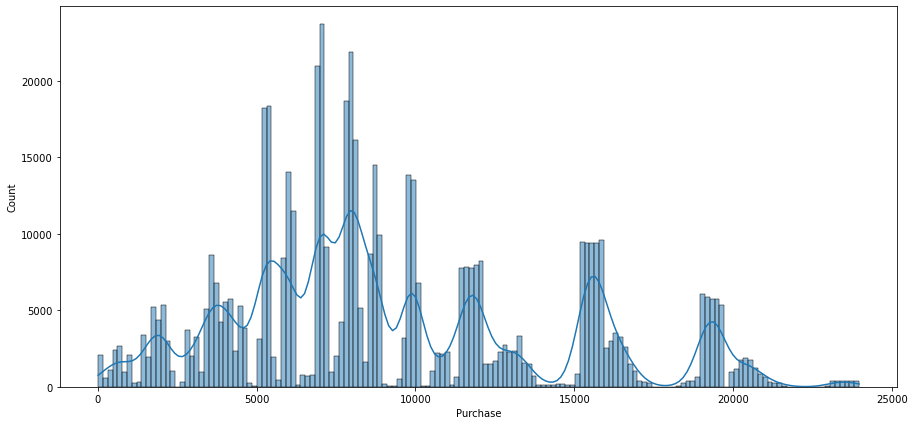

In [14]:
plt.figure(figsize=(15,7))
sns.histplot(train['Purchase'], kde=True)

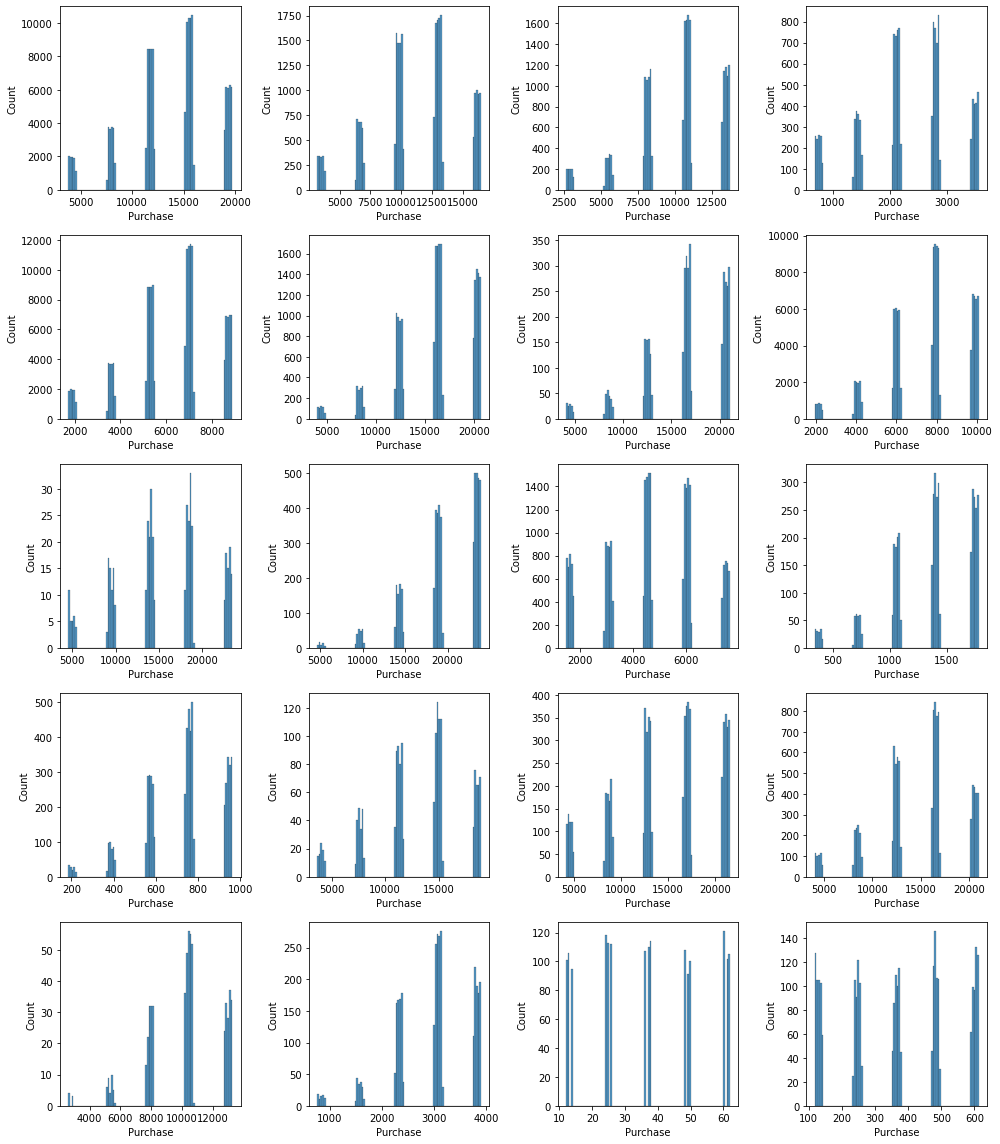

In [14]:
fig, axes = plt.subplots(5, 4, figsize=(14,16))
for i, ax in enumerate(axes.ravel()):
    sns.histplot(x=train[train['Product_Category_1']==i+1]['Purchase'], ax=ax, bins=96)
plt.tight_layout()

In [15]:
r = random.choices(train['Product_ID'].values, k=20)

In [16]:
r[:5]

['P00016042', 'P00288042', 'P00044442', 'P00241542', 'P00313542']

In [17]:
train[train['Product_ID']=='P00345842'].groupby(by='User_ID').mean()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,,,,,,
1000006,9.0,0.0,2.0,8.0,14.0,12951.0
1000010,1.0,1.0,2.0,8.0,14.0,16216.0
1000013,1.0,1.0,2.0,8.0,14.0,9760.0
1000023,0.0,1.0,2.0,8.0,14.0,16137.0
1000042,8.0,1.0,2.0,8.0,14.0,9528.0
...,...,...,...,...,...,...
1005615,7.0,0.0,2.0,8.0,14.0,9968.0
1005620,14.0,1.0,2.0,8.0,14.0,13075.0
1005767,2.0,0.0,2.0,8.0,14.0,15905.0


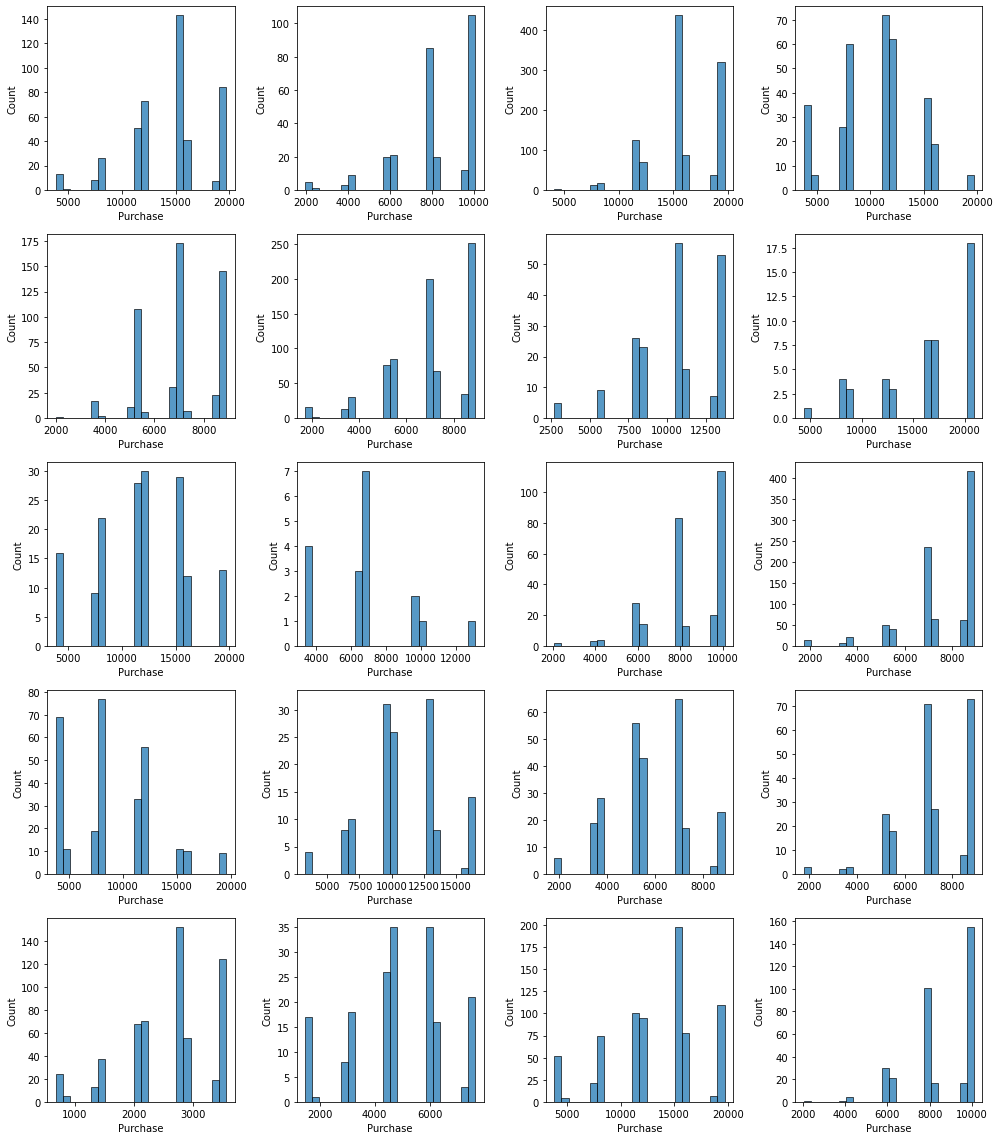

In [18]:
fig, axes = plt.subplots(5, 4, figsize=(14,16))
for i, ax in enumerate(axes.ravel()):
    sns.histplot(x=train[train['Product_ID']==r[i]]['Purchase'], ax=ax, bins=24)
plt.tight_layout()

## Violin plot

<AxesSubplot:xlabel='Purchase'>

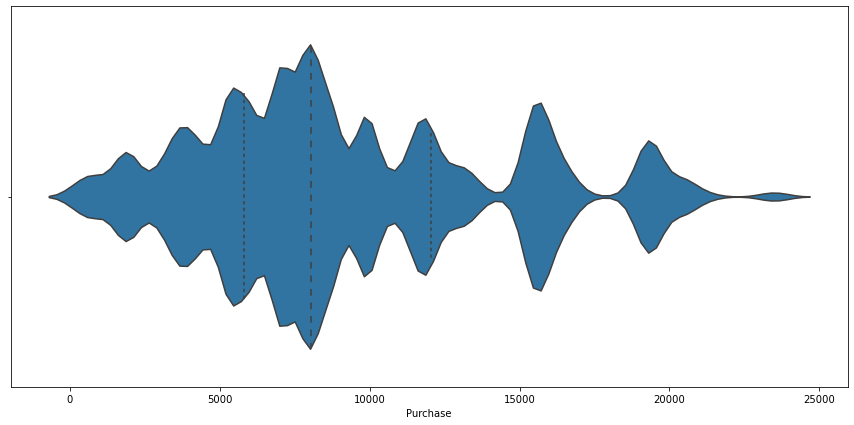

In [21]:
plt.figure(figsize=(15,7))
sns.violinplot(x=train['Purchase'], inner='quartile')

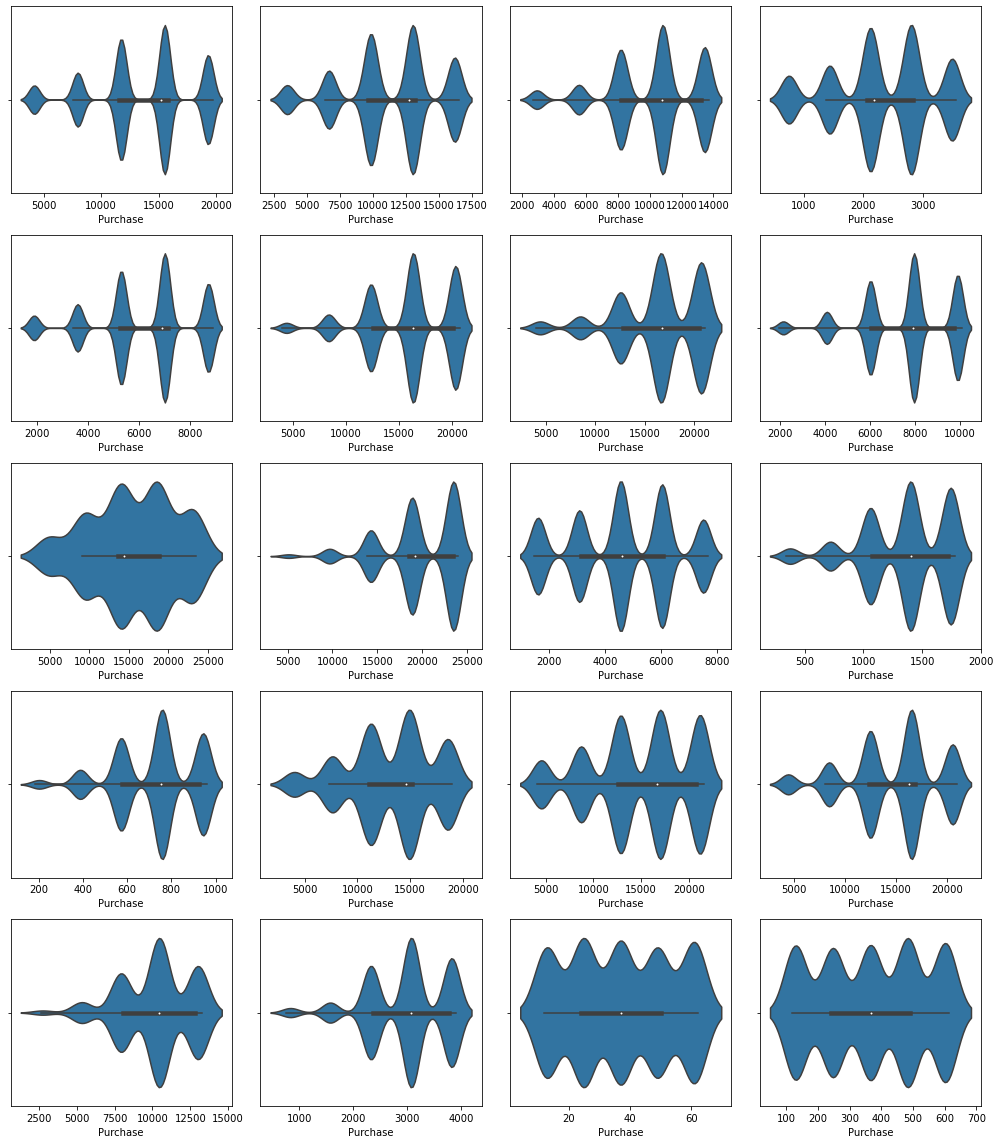

In [22]:
fig, axes = plt.subplots(5, 4, figsize=(14,16))
for i, ax in enumerate(axes.ravel()):
    sns.violinplot(x=train[train['Product_Category_1']==i+1]['Purchase'], ax=ax, bins=96)
plt.tight_layout()

## count plot for categorical variables

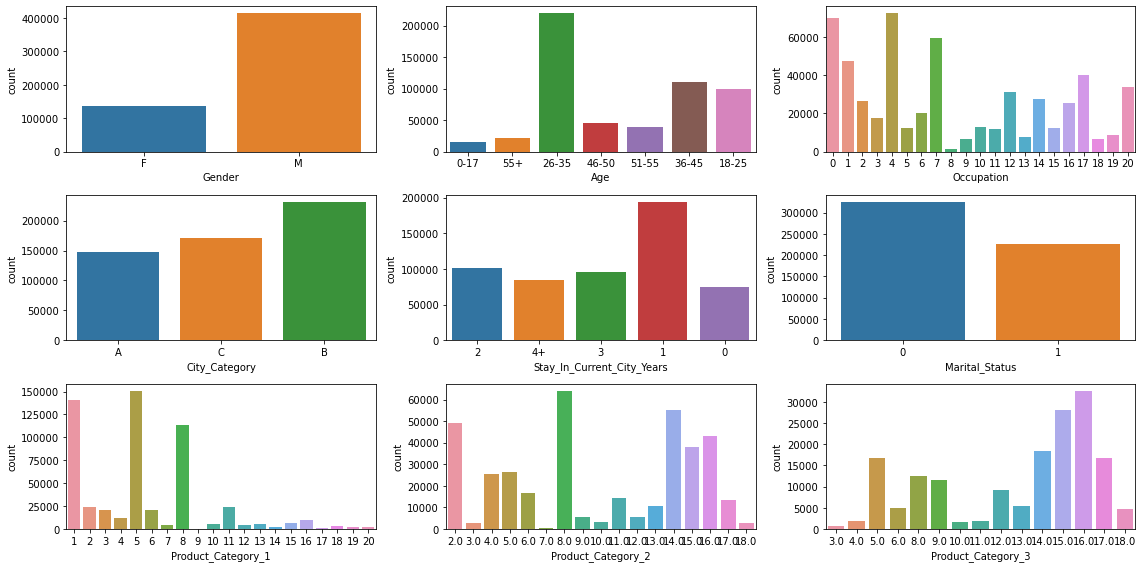

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(16,8))
for i, ax in enumerate(axes.ravel()):
    sns.countplot(x=train.iloc[:, i+2], ax=ax)
plt.tight_layout()

## Bar plot for categorical variables

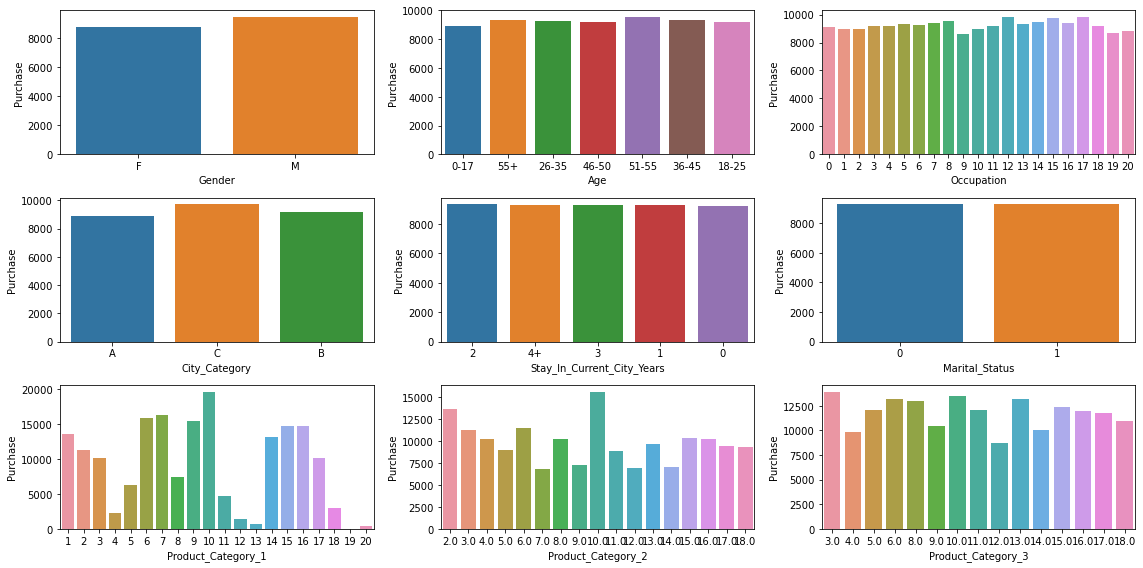

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(16,8))
for i, ax in enumerate(axes.ravel()):
    sns.barplot(x=train.iloc[:, i+2], y=train['Purchase'], ci=None, ax=ax)
plt.tight_layout()

## Violin plot for categorical variables

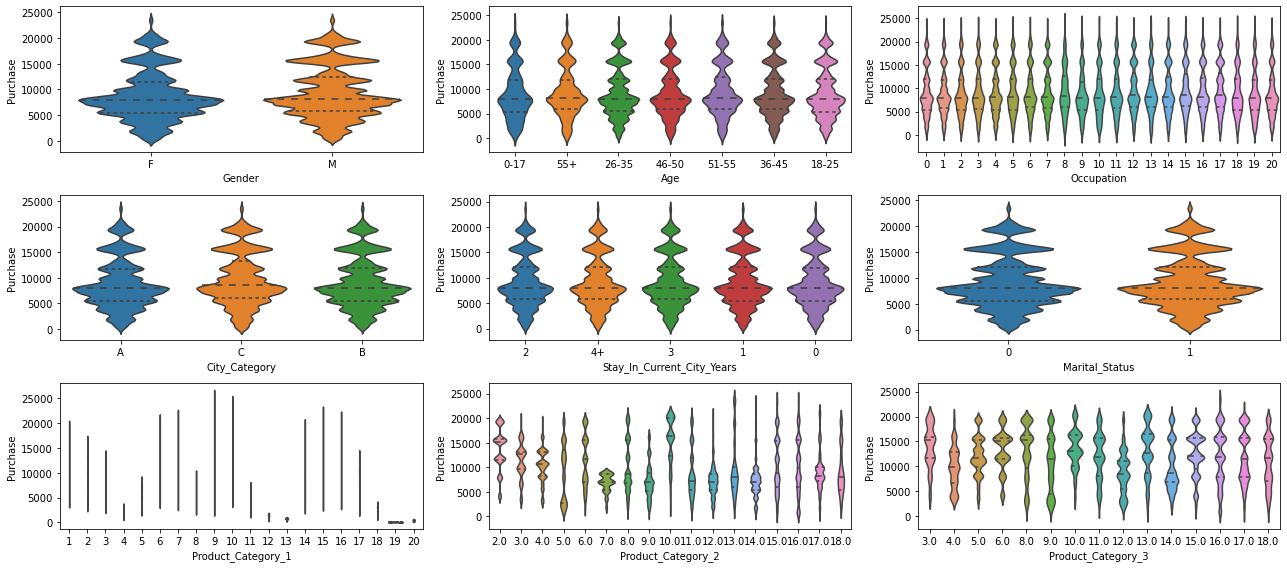

In [23]:
fig, axes = plt.subplots(3, 3, figsize=(18,8))
for i, ax in enumerate(axes.ravel()):
    sns.violinplot(x=train.iloc[:, i+2], y='Purchase', data=train, ax=ax, inner='quartile')
plt.tight_layout()

# Variable Analysis

In [13]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [14]:
train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

## User_ID

In [18]:
train['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

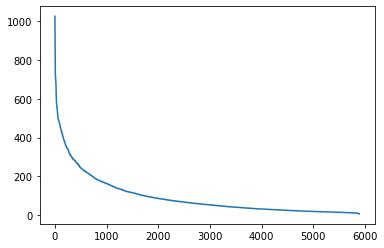

In [19]:
plt.plot(train['User_ID'].value_counts().values)

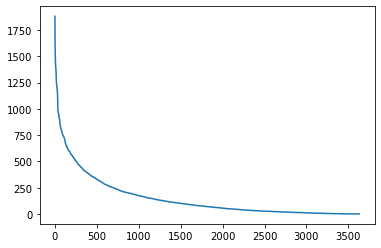

In [20]:
plt.plot(train['Product_ID'].value_counts().values)

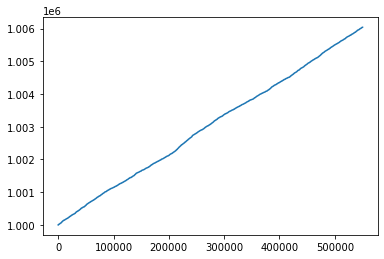

In [21]:
plt.plot(list(range(0,train.shape[0])), train['User_ID'].sort_values())

In [22]:
train.groupby(by='Product_ID').count().sort_values(by='Purchase', ascending=False)[:900].sum()

User_ID                       393414
Gender                        393414
Age                           393414
Occupation                    393414
City_Category                 393414
Stay_In_Current_City_Years    393414
Marital_Status                393414
Product_Category_1            393414
Product_Category_2            293798
Product_Category_3            146354
Purchase                      393414
dtype: int64

In [23]:
train.groupby(by='User_ID').count().sort_values(by='Purchase')

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,,,,,,,,,,,
1000708,6,6,6,6,6,6,6,6,3,2,6
1005810,7,7,7,7,7,7,7,7,4,2,7
1005608,7,7,7,7,7,7,7,7,5,3,7
1002111,7,7,7,7,7,7,7,7,3,1,7
1004991,7,7,7,7,7,7,7,7,5,2,7
...,...,...,...,...,...,...,...,...,...,...,...
1000889,823,823,823,823,823,823,823,823,543,205,823
1001181,862,862,862,862,862,862,862,862,533,196,862
1001941,898,898,898,898,898,898,898,898,564,219,898


In [17]:
by_user = train.groupby(by='User_ID').mean().sort_values(by='Purchase')

In [18]:
by_user.shape

(5891, 6)

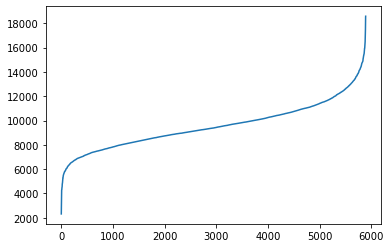

In [19]:
plt.plot(list(range(0, by_user.shape[0])), by_user['Purchase'])

<AxesSubplot:ylabel='Purchase'>

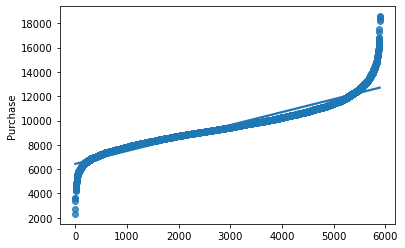

In [20]:
sns.regplot(x=list(range(0, by_user.shape[0])), y=by_user['Purchase'])

In [21]:
by_user['user_order'] = list(range(1, 5892))

In [22]:
by_user

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,user_order
User_ID,,,,,,,
1004486,8.0,0.0,7.033333,11.062500,12.666667,2318.733333,1
1003598,1.0,0.0,5.261905,7.920000,13.687500,2698.357143,2
1002744,17.0,1.0,5.467391,7.051282,10.657143,3421.521739,3
1005944,10.0,0.0,7.066667,10.909091,14.500000,3599.733333,4
1004636,2.0,1.0,5.500000,9.875000,14.000000,3612.812500,5
...,...,...,...,...,...,...,...
1003461,0.0,0.0,1.650000,7.833333,13.538462,17508.700000,5887
1001349,7.0,1.0,1.000000,7.650000,11.714286,18162.739130,5888
1005999,1.0,1.0,7.611111,10.615385,13.571429,18345.944444,5889


<AxesSubplot:xlabel='user_order', ylabel='Purchase'>

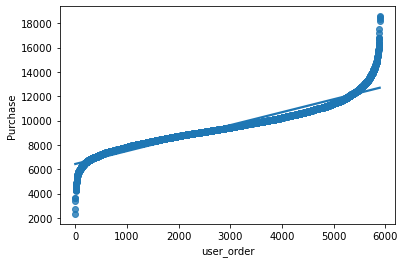

In [23]:
sns.regplot(data=by_user, x='user_order', y='Purchase')

In [24]:
by_user.index

Int64Index([1004486, 1003598, 1002744, 1005944, 1004636, 1004539, 1004349,
            1004295, 1001721, 1001102,
            ...
            1004474, 1000592, 1005994, 1002983, 1000101, 1003461, 1001349,
            1005999, 1005069, 1003902],
           dtype='int64', name='User_ID', length=5891)

In [25]:
by_user['user_order'].values

array([   1,    2,    3, ..., 5889, 5890, 5891], dtype=int64)

In [26]:
user_reorder = dict(zip(by_user['user_order'].index, by_user['user_order'].values))

In [27]:
train['User_order'] = train['User_ID'].apply(lambda x : user_reorder[x])

In [28]:
test['User_order'] = test['User_ID'].apply(lambda x : user_reorder[x])

In [29]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,3130
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,3130
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,3130
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,3130
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,4302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368,5755
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371,137
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137,1163
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365,716


In [30]:
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,User_order
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,5822
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,3996
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,3362
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,3362
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,1109
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,1163
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,1163
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,1163
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,2634


In [31]:
train[train['Product_Category_1']==1].groupby(by='User_ID').mean().sort_values(by='Purchase')

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order
User_ID,,,,,,,
1002982,4.0,0.0,1.0,2.0,15.0,3799.0,5471.0
1001107,1.0,1.0,1.0,5.0,NaN,3838.0,247.0
1002202,10.0,0.0,1.0,5.0,15.0,3848.0,127.0
1001471,17.0,0.0,1.0,2.0,9.0,3879.0,1437.0
1005439,13.0,1.0,1.0,8.0,17.0,3886.0,396.0
...,...,...,...,...,...,...,...
1002108,10.0,0.0,1.0,11.0,8.0,19663.5,4326.0
1004254,17.0,0.0,1.0,2.0,5.0,19675.0,2692.0
1001813,6.0,0.0,1.0,6.0,14.0,19703.0,393.0


In [32]:
def category_mean(i):
    category = train[train['Product_Category_1']==i].groupby(by='User_ID').mean().sort_values(by='Purchase')
    # print (category.shape)
    
    category['user_order'] = list(range(1, category.shape[0]+1))
    user_reorder = dict(zip(category['user_order'].index, category['user_order'].values))
    
    train.loc[train['Product_Category_1']==i, 'User_order_1'] = train[train['Product_Category_1']==i]['User_ID'].apply(lambda x : user_reorder[x])

In [33]:
for i in range(1, 21):
    category_mean(i)

In [34]:
user_reorder

{1004486: 1,
 1003598: 2,
 1002744: 3,
 1005944: 4,
 1004636: 5,
 1004539: 6,
 1004349: 7,
 1004295: 8,
 1001721: 9,
 1001102: 10,
 1003843: 11,
 1005850: 12,
 1002352: 13,
 1001608: 14,
 1003959: 15,
 1004916: 16,
 1005334: 17,
 1005896: 18,
 1001045: 19,
 1004955: 20,
 1001341: 21,
 1001562: 22,
 1001100: 23,
 1003528: 24,
 1004575: 25,
 1000836: 26,
 1001357: 27,
 1004360: 28,
 1002431: 29,
 1004464: 30,
 1002033: 31,
 1002106: 32,
 1003793: 33,
 1004493: 34,
 1005012: 35,
 1005274: 36,
 1004430: 37,
 1001434: 38,
 1003883: 39,
 1000305: 40,
 1005465: 41,
 1003642: 42,
 1004712: 43,
 1005117: 44,
 1004883: 45,
 1000709: 46,
 1005420: 47,
 1001992: 48,
 1005686: 49,
 1004695: 50,
 1005214: 51,
 1005959: 52,
 1004102: 53,
 1001153: 54,
 1003043: 55,
 1003806: 56,
 1004059: 57,
 1000045: 58,
 1004399: 59,
 1003026: 60,
 1002318: 61,
 1001450: 62,
 1001169: 63,
 1003865: 64,
 1004125: 65,
 1002305: 66,
 1000463: 67,
 1003264: 68,
 1000941: 69,
 1002343: 70,
 1000460: 71,
 1005033: 72,
 

In [35]:
def pr_1_order(x, pr_order):
    try:
        return pr_order[x]
    except KeyError:
        return user_reorder[x] / len(user_reorder) * len(pr_order)
    

In [36]:
def category_mean(i):
    category = train[train['Product_Category_1']==i].groupby(by='User_ID').mean().sort_values(by='Purchase')
    # print (category.shape)
    
    category['user_order'] = list(range(1, category.shape[0]+1))
    user_reorder_1 = dict(zip(category['user_order'].index, category['user_order'].values))
    
    test.loc[test['Product_Category_1']==i, 'User_order_1'] = test[test['Product_Category_1']==i]['User_ID'].apply(lambda x : pr_1_order(x, user_reorder_1))

In [200]:
for i in range(1, 19):
    category_mean(i)

In [45]:
len(set(train[train['Product_Category_1']==1]['User_ID']))

5767

In [46]:
len(set(train[train['Product_Category_1']==1]['User_ID']) - set(test[test['Product_Category_1']==1]['User_ID']))

471

In [47]:
len(set(test[test['Product_Category_1']==1]['User_ID']) - set(train[train['Product_Category_1']==1]['User_ID']))

69

In [48]:
test[test['Product_Category_1']==17]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,User_order,User_order_1
1887,1003108,P00174842,M,51-55,6,B,1,1,17,NaN,NaN,4036,255.000000
5256,1002203,P00246842,M,46-50,12,B,4+,1,17,NaN,NaN,4982,307.000000
5683,1002941,P00246942,M,36-45,12,B,1,1,17,NaN,NaN,2834,253.000000
5808,1003143,P00064442,F,51-55,16,C,1,1,17,NaN,NaN,614,44.400611
7057,1004870,P00311342,F,36-45,3,C,1,1,17,NaN,NaN,2152,155.619080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227684,1002909,P00285242,M,26-35,7,A,1,0,17,NaN,NaN,4320,304.000000
230134,1000688,P00246942,M,55+,13,C,2,1,17,NaN,NaN,2407,241.000000
230577,1001340,P00174842,M,26-35,7,A,2,0,17,NaN,NaN,80,5.785096
231932,1003476,P00072342,M,51-55,0,B,2,1,17,NaN,NaN,173,358.000000


In [49]:
test.groupby(by='Product_Category_1').count()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_2,Product_Category_3,User_order,User_order_1
Product_Category_1,,,,,,,,,,,,
1,60321,60321,60321,60321,60321,60321,60321,60321,57394,39136,60321,60321
2,10192,10192,10192,10192,10192,10192,10192,10192,9775,6840,10192,10192
3,8578,8578,8578,8578,8578,8578,8578,8578,8459,5242,8578,8578
4,5003,5003,5003,5003,5003,5003,5003,5003,4925,2272,5003,5003
5,65017,65017,65017,65017,65017,65017,65017,65017,37538,8047,65017,65017
6,8860,8860,8860,8860,8860,8860,8860,8860,8406,3565,8860,8860
7,1624,1624,1624,1624,1624,1624,1624,1624,128,0,1624,1624
8,48369,48369,48369,48369,48369,48369,48369,48369,22648,3796,48369,48369
9,194,194,194,194,194,194,194,194,194,0,194,194


In [50]:
train[train['Product_Category_1']==1].groupby(by='User_ID').mean()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1
User_ID,,,,,,,,
1000001,10.0,0.0,1.0,4.500000,11.250000,15401.000000,3130.0,4018.0
1000002,16.0,0.0,1.0,9.466667,13.555556,13344.161290,4302.0,2002.0
1000003,15.0,0.0,1.0,2.400000,11.700000,15238.533333,5207.0,3850.0
1000004,7.0,1.0,1.0,8.500000,14.111111,15845.153846,5822.0,4588.0
1000005,20.0,1.0,1.0,10.941176,13.125000,10800.055556,923.0,460.0
...,...,...,...,...,...,...,...,...
1006035,1.0,0.0,1.0,6.941176,12.586207,11542.147059,137.0,706.0
1006036,15.0,1.0,1.0,8.023529,13.315789,11395.534884,1163.0,641.0
1006037,1.0,0.0,1.0,10.500000,13.700000,13438.928571,2634.0,2077.0


In [51]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,3130,2465.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,3130,4018.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,3130,784.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,3130,784.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,4302,4322.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368,5755,1273.0
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371,137,1330.0
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137,1163,398.0
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365,716,1215.0


## product_ID

In [52]:
train['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [53]:
train.groupby(by='Product_ID').mean().sort_values(by='Purchase')

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1
Product_ID,,,,,,,,,
P00370293,1.002956e+06,8.198726,0.421656,19.0,NaN,NaN,36.675159,2905.156688,789.244586
P00370853,1.003121e+06,8.374083,0.398533,19.0,NaN,NaN,37.393643,2859.083130,814.240831
P00371644,1.003075e+06,8.095662,0.417130,20.0,NaN,NaN,362.911012,2799.362625,1242.073415
P00375436,1.002972e+06,7.964373,0.429975,20.0,NaN,NaN,374.266585,2953.654791,1295.022113
P00372445,1.003075e+06,8.387097,0.412186,20.0,NaN,NaN,374.930705,2888.320191,1292.416965
...,...,...,...,...,...,...,...,...,...
P00119342,1.003012e+06,8.600649,0.538961,10.0,13.0,NaN,20448.756494,3202.655844,1232.269481
P00116142,1.003157e+06,8.116822,0.454829,10.0,13.0,16.0,20463.791277,3152.976636,1202.892523
P00200642,1.003040e+06,8.319703,0.520446,10.0,16.0,NaN,20468.773234,3043.910781,1213.959108


In [37]:
by_product = train.groupby(by='Product_ID').mean().sort_values(by='Purchase')

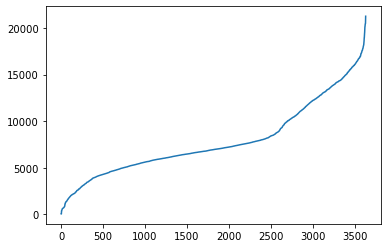

In [38]:
plt.plot(list(range(1, 3632)), by_product['Purchase'])

<AxesSubplot:ylabel='Purchase'>

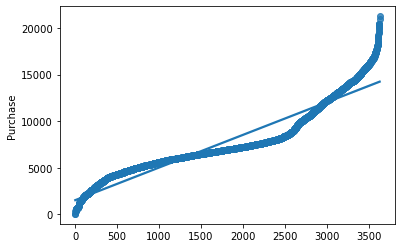

In [39]:
sns.regplot(x=(list(range(1, 3632))), y=by_product['Purchase'])

## Product Category

In [40]:
train.groupby(by='Product_Category_1').count()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1
Product_Category_1,,,,,,,,,,,,,
1,140378,140378,140378,140378,140378,140378,140378,140378,133780,91142,140378,140378,140378
2,23864,23864,23864,23864,23864,23864,23864,23864,22934,16309,23864,23864,23864
3,20213,20213,20213,20213,20213,20213,20213,20213,19974,12462,20213,20213,20213
4,11753,11753,11753,11753,11753,11753,11753,11753,11610,5349,11753,11753,11753
5,150933,150933,150933,150933,150933,150933,150933,150933,87233,19011,150933,150933,150933
6,20466,20466,20466,20466,20466,20466,20466,20466,19473,8398,20466,20466,20466
7,3721,3721,3721,3721,3721,3721,3721,3721,300,0,3721,3721,3721
8,113925,113925,113925,113925,113925,113925,113925,113925,53165,9068,113925,113925,113925
9,410,410,410,410,410,410,410,410,409,0,410,410,410


In [41]:
train.groupby(by='Product_Category_1').mean()

,User_ID,Occupation,Marital_Status,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1
Product_Category_1,,,,,,,,
1,1.003027e+06,8.271674,0.398944,7.743325,12.766716,13606.218596,3195.067739,2475.352106
2,1.003041e+06,8.292616,0.407560,6.656536,10.603103,11251.935384,2821.402447,1924.736968
3,1.002986e+06,7.877455,0.388562,4.490588,8.205505,10096.705734,2627.301687,1827.102310
4,1.003049e+06,7.950055,0.389347,5.992851,10.607403,2329.659491,2264.739386,1528.975666
5,1.003022e+06,7.987995,0.405988,10.947428,14.170428,6240.088178,2323.440275,2498.644690
6,1.003051e+06,8.177416,0.406870,10.036718,14.164087,15838.478550,2946.929200,1912.822193
7,1.003002e+06,7.966138,0.451760,12.513333,NaN,16365.689600,2775.494222,731.614351
8,1.003029e+06,7.880676,0.425842,14.645255,16.305360,7498.958078,2497.096142,2591.409901
9,1.003149e+06,8.958537,0.397561,15.000000,NaN,15537.375610,3329.392683,205.500000


<AxesSubplot:xlabel='Purchase', ylabel='Count'>

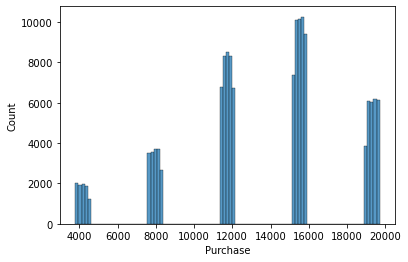

In [42]:
sns.histplot(train[train['Product_Category_1']==1]['Purchase'])

In [43]:
train.groupby(by='Product_Category_1').mean().sort_values(by='Purchase')

,User_ID,Occupation,Marital_Status,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1
Product_Category_1,,,,,,,,
19,1.003040e+06,8.288210,0.409857,NaN,NaN,37.041797,2881.645664,802.000000
20,1.003042e+06,8.149412,0.419608,NaN,NaN,370.481176,2877.814118,1275.500000
13,1.003136e+06,8.156064,0.430168,15.627463,16.000000,722.400613,2712.307263,1077.606416
12,1.003022e+06,7.850519,0.484672,14.331797,17.000000,1350.859894,2253.339498,789.733722
4,1.003049e+06,7.950055,0.389347,5.992851,10.607403,2329.659491,2264.739386,1528.975666
18,1.003191e+06,8.331520,0.474880,NaN,NaN,2972.864320,2827.352640,630.888640
11,1.003016e+06,8.053568,0.396056,15.122356,16.000000,4685.268456,2342.939680,1680.218224
5,1.003022e+06,7.987995,0.405988,10.947428,14.170428,6240.088178,2323.440275,2498.644690
8,1.003029e+06,7.880676,0.425842,14.645255,16.305360,7498.958078,2497.096142,2591.409901


In [44]:
train.groupby(by='Product_Category_2').mean().sort_values(by='Purchase')

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_3,Purchase,User_order,User_order_1
Product_Category_2,,,,,,,,
7.0,1.002846e+06,7.672524,0.410543,5.000000,NaN,6884.683706,2574.581470,2831.926518
12.0,1.003029e+06,7.845333,0.435601,5.579052,14.497477,6975.472504,2266.291787,2401.033828
14.0,1.003047e+06,7.793369,0.412227,6.224196,16.448230,7105.264916,2383.931172,2419.106845
9.0,1.003103e+06,8.038293,0.398735,4.340067,14.268677,7277.006851,2738.546988,2309.316353
11.0,1.003032e+06,8.161455,0.391397,4.029291,14.394719,8940.580515,2637.586104,2369.313216
5.0,1.003046e+06,8.118125,0.393825,2.308710,11.522766,9027.821574,2612.757995,1967.259005
18.0,1.003091e+06,8.399639,0.458484,4.432130,NaN,9352.440433,2854.209386,2643.487004
17.0,1.003083e+06,8.348348,0.431006,6.770120,NaN,9421.576577,2876.211937,2575.894745
13.0,1.003075e+06,8.094958,0.432533,7.597949,15.447313,9683.352388,2678.574684,2198.386858


In [45]:
train[train['Product_Category_1']==7].groupby(by='Product_Category_2').count()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_3,Purchase,User_order,User_order_1
Product_Category_2,,,,,,,,,,,,,
8.0,84,84,84,84,84,84,84,84,84,0,84,84,84
12.0,118,118,118,118,118,118,118,118,118,0,118,118,118
17.0,98,98,98,98,98,98,98,98,98,0,98,98,98


In [46]:
train[train['Product_Category_2']==6].groupby(by='Product_Category_3').count()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,User_order,User_order_1
Product_Category_3,,,,,,,,,,,,,
8.0,5129,5129,5129,5129,5129,5129,5129,5129,5129,5129,5129,5129,5129
9.0,637,637,637,637,637,637,637,637,637,637,637,637,637
11.0,217,217,217,217,217,217,217,217,217,217,217,217,217
13.0,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012
14.0,1426,1426,1426,1426,1426,1426,1426,1426,1426,1426,1426,1426,1426
15.0,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449
16.0,2267,2267,2267,2267,2267,2267,2267,2267,2267,2267,2267,2267,2267


In [64]:
train['Product_ID']

0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
550063    P00372445
550064    P00375436
550065    P00375436
550066    P00375436
550067    P00371644
Name: Product_ID, Length: 550068, dtype: object

In [65]:
train[train['Product_ID'] == 'P00248942']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,3130,4018.0
126,1000024,P00248942,F,26-35,7,A,3,1,1,6.0,14.0,15774,2909,2737.0
405,1000068,P00248942,M,18-25,4,A,0,0,1,6.0,14.0,11429,833,674.0
516,1000093,P00248942,M,26-35,17,B,1,1,1,6.0,14.0,11754,4800,693.0
701,1000135,P00248942,M,18-25,4,C,1,1,1,6.0,14.0,19146,2736,3847.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542905,1005595,P00248942,M,26-35,20,B,1,0,1,6.0,14.0,15466,3829,1073.0
544481,1005813,P00248942,M,26-35,7,A,1,1,1,6.0,14.0,15192,5273,2865.0
545091,1005915,P00248942,M,18-25,4,C,0,0,1,6.0,14.0,19653,4024,1863.0
545123,1005916,P00248942,M,51-55,20,B,1,1,1,6.0,14.0,11954,940,1077.0


In [66]:
train[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].value_counts()

Product_Category_1  Product_Category_2  Product_Category_3
1                   2.0                 15.0                  14882
                    15.0                16.0                   9015
                    2.0                 5.0                    7982
3                   4.0                 5.0                    6654
1                   8.0                 17.0                   6620
                                                              ...  
8                   14.0                15.0                     36
5                   14.0                15.0                     23
8                   14.0                18.0                     18
2                   12.0                14.0                     13
5                   10.0                16.0                      2
Length: 137, dtype: int64

In [67]:
train[(train['User_ID']==1001680) & (train['Product_Category_1']==1) & (train['Product_Category_2']==4.0) & (train['Product_Category_3']==8.0)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1


In [68]:
train[train['User_ID']==1001680][['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].value_counts()

Product_Category_1  Product_Category_2  Product_Category_3
1                   2.0                 15.0                  11
3                   4.0                 12.0                   9
1                   15.0                16.0                   9
2                   4.0                 9.0                    9
5                   8.0                 14.0                   7
                                                              ..
3                   4.0                 8.0                    1
                    5.0                 16.0                   1
5                   6.0                 8.0                    1
                                        9.0                    1
15                  16.0                17.0                   1
Length: 89, dtype: int64

In [69]:
train.groupby(by=['Product_Category_1', 'Product_Category_2']).std()

User_ID  Occupation  \
Product_Category_1 Product_Category_2                            
1                  2.0                 1739.649976    6.446826   
                   3.0                 1705.857214    5.976977   
                   4.0                 1707.947162    6.361922   
                   5.0                 1673.597031    6.447671   
                   6.0                 1715.395362    6.526502   
...                                            ...         ...   
14                 16.0                1748.052941    6.704360   
                   17.0                1661.834915    6.767191   
                   18.0                1744.569400    6.940903   
15                 16.0                1678.706616    6.598914   
                   17.0                1764.107772    6.593666   

                                       Marital_Status  Product_Category_3  \
Product_Category_1 Product_Category_2                                       
1                  2.0                       0.488434            4.344355   
                   3.0                       0.457572            0.000000   
                   4.0                       0.464986            0.000000   
                   5.0                       0.488459            4.806752   
                   6.0                       0.490772            3.512096   
...                                               ...                 ...   
14                 16.0                      0.497071                 NaN   
                   17.0                      0.502905                 NaN   
                   18.0                      0.496198                 NaN   
15                 16.0                      0.491238            0.000000   
                   17.0                      0.496165                 NaN   

                                          Purchase   User_order  User_order_1  
Product_Category_1 Product_Category_2                                          
1                  2.0                 4275.570831  1639.165767   1489.300755  
                   3.0                 5221.329089  1764.646053   1451.234973  
                   4.0                 4167.904627  1675.714128   1405.077921  
                   5.0                 4369.477298  1685.250928   1471.294546  
                   6.0                 4227.152724  1620.781051   1512.223253  
...                                            ...          ...           ...  
14                 16.0                3712.118089  1449.719418    260.967359  
                   17.0                3868.683328  1420.387903    271.649124  
                   18.0                3553.012098  1691.700829    256.614918  
15                 16.0                4826.726132  1605.728842    581.191922  
                   17.0                3291.291034  1508.217875    599.185361  

[87 rows x 7 columns]

In [70]:
train[(train['Product_Category_1']==1) & (train['Product_Category_2']==8.0)].groupby(by='User_ID').count()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1
User_ID,,,,,,,,,,,,,
1000001,1,1,1,1,1,1,1,1,1,1,1,1,1
1000002,5,5,5,5,5,5,5,5,5,3,5,5,5
1000004,2,2,2,2,2,2,2,2,2,1,2,2,2
1000005,2,2,2,2,2,2,2,2,2,1,2,2,2
1000006,2,2,2,2,2,2,2,2,2,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006035,3,3,3,3,3,3,3,3,3,3,3,3,3
1006036,7,7,7,7,7,7,7,7,7,2,7,7,7
1006037,1,1,1,1,1,1,1,1,1,1,1,1,1


In [71]:
train[(train['Product_Category_1']==1) & (train['Product_Category_2']==8.0)].groupby(by='User_ID').std()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1
User_ID,,,,,,,,
1000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000002,0.0,0.0,0.0,0.0,0.577350,5741.366188,0.0,0.0
1000004,0.0,0.0,0.0,0.0,NaN,2377.292998,0.0,0.0
1000005,0.0,0.0,0.0,0.0,NaN,2554.776800,0.0,0.0
1000006,0.0,0.0,0.0,0.0,NaN,2760.544874,0.0,0.0
...,...,...,...,...,...,...,...,...
1006035,0.0,0.0,0.0,0.0,1.000000,7578.294531,0.0,0.0
1006036,0.0,0.0,0.0,0.0,0.707107,5709.614573,0.0,0.0
1006037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
train[(train['User_ID']==1000001) & (train['Product_Category_1']==3) & (train['Product_Category_2']==4.0) & (train['Product_Category_3']==12.0)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1
78146,1000001,P00004842,F,0-17,10,A,2,0,3,4.0,12.0,13645,3130,2465.0
155572,1000001,P0096542,F,0-17,10,A,2,0,3,4.0,12.0,13627,3130,2465.0
428894,1000001,P00074142,F,0-17,10,A,2,0,3,4.0,12.0,10572,3130,2465.0
467663,1000001,P00058142,F,0-17,10,A,2,0,3,4.0,12.0,11051,3130,2465.0
506601,1000001,P00064042,F,0-17,10,A,2,0,3,4.0,12.0,8190,3130,2465.0


<AxesSubplot:xlabel='Purchase', ylabel='Count'>

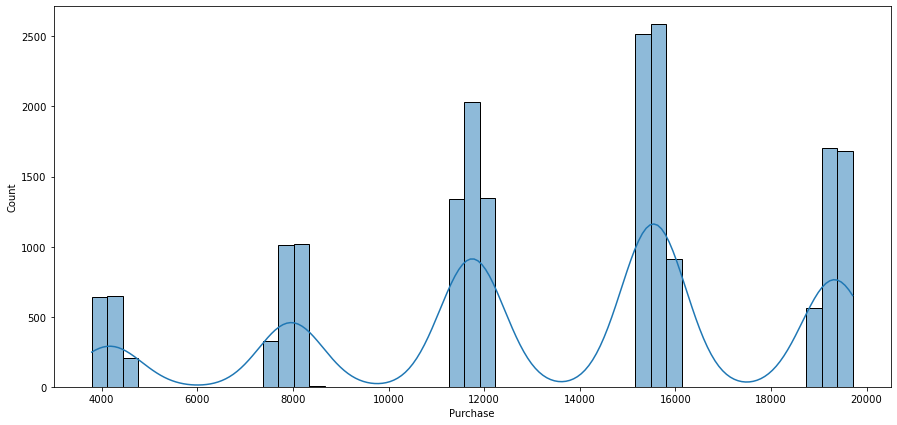

In [73]:
plt.figure(figsize=(15,7))
sns.histplot(train[(train['Product_Category_1']==1) & (train['Product_Category_2']==15.0)]['Purchase'], kde=True)

<AxesSubplot:>

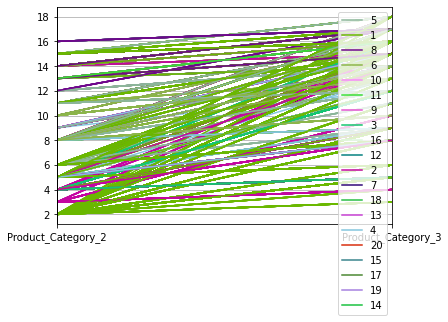

In [74]:
pd.plotting.parallel_coordinates(train.sample(10000), 'Product_Category_1', 
                                 cols=['Product_Category_2', 'Product_Category_3'])

## Purchase

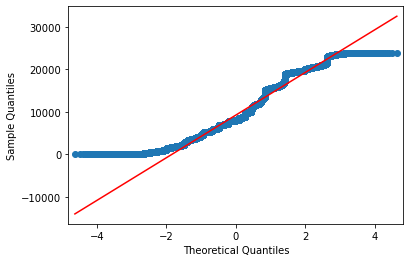

In [75]:
sm.qqplot(train['Purchase'], line='s');

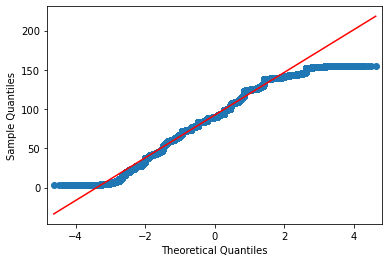

In [76]:
sm.qqplot(np.sqrt(train['Purchase']), line='s');

In [77]:
train['Purchase'].min()

12

In [78]:
train['Purchase'].max()

23961

In [79]:
train['Purchase'].mean()

9263.968712959126

In [80]:
train['Purchase'].median()

8047.0

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

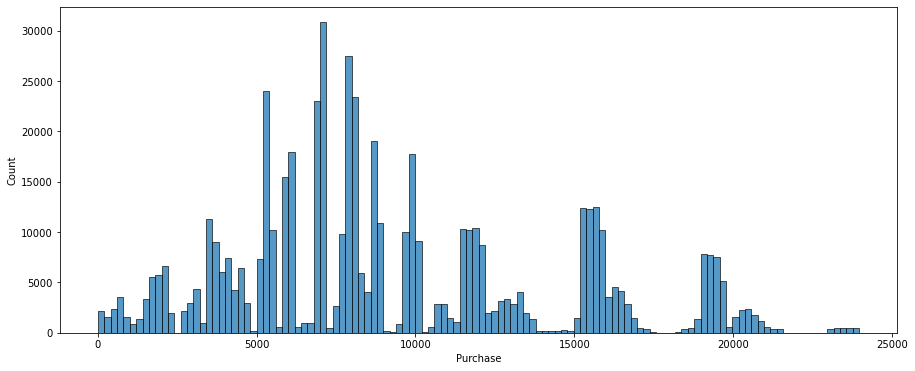

In [81]:
plt.figure(figsize=(15,6))
sns.histplot(train['Purchase'], bins=120)

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

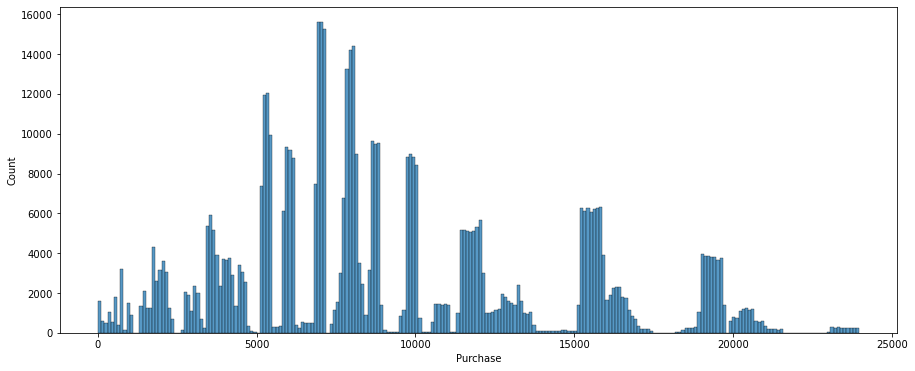

In [82]:
plt.figure(figsize=(15,6))
sns.histplot(train['Purchase'], bins=240)

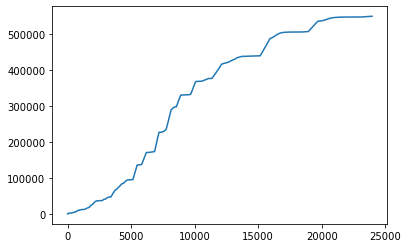

In [83]:
plt.plot(train['Purchase'].sort_values(), train['Purchase'].index)

In [84]:
train.groupby(by='Product_ID').mean().sort_values(by='Purchase')

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1
Product_ID,,,,,,,,,
P00370293,1.002956e+06,8.198726,0.421656,19.0,NaN,NaN,36.675159,2905.156688,789.244586
P00370853,1.003121e+06,8.374083,0.398533,19.0,NaN,NaN,37.393643,2859.083130,814.240831
P00371644,1.003075e+06,8.095662,0.417130,20.0,NaN,NaN,362.911012,2799.362625,1242.073415
P00375436,1.002972e+06,7.964373,0.429975,20.0,NaN,NaN,374.266585,2953.654791,1295.022113
P00372445,1.003075e+06,8.387097,0.412186,20.0,NaN,NaN,374.930705,2888.320191,1292.416965
...,...,...,...,...,...,...,...,...,...
P00119342,1.003012e+06,8.600649,0.538961,10.0,13.0,NaN,20448.756494,3202.655844,1232.269481
P00116142,1.003157e+06,8.116822,0.454829,10.0,13.0,16.0,20463.791277,3152.976636,1202.892523
P00200642,1.003040e+06,8.319703,0.520446,10.0,16.0,NaN,20468.773234,3043.910781,1213.959108


In [85]:
train['Product_ID']

0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
550063    P00372445
550064    P00375436
550065    P00375436
550066    P00375436
550067    P00371644
Name: Product_ID, Length: 550068, dtype: object

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

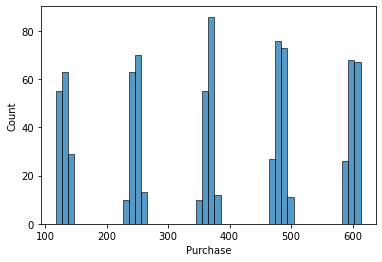

In [86]:
sns.histplot(train[train['Product_ID'] == 'P00375436']['Purchase'], bins=50)

In [87]:
train[train['Product_ID'] == 'P00119342'].groupby(by='User_ID').mean().sort_values(by='Purchase')

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1
User_ID,,,,,,,,
1003610,6.0,0.0,10.0,13.0,NaN,4678.0,181.0,17.0
1003014,7.0,1.0,10.0,13.0,NaN,4975.0,1484.0,106.0
1002041,20.0,0.0,10.0,13.0,NaN,9552.0,1168.0,404.0
1002484,5.0,0.0,10.0,13.0,NaN,9640.0,1422.0,113.0
1000889,20.0,0.0,10.0,13.0,NaN,13854.0,243.0,1135.0
...,...,...,...,...,...,...,...,...
1001497,5.0,1.0,10.0,13.0,NaN,23924.0,5655.0,2307.0
1004579,4.0,1.0,10.0,13.0,NaN,23936.0,2000.0,878.0
1005693,4.0,0.0,10.0,13.0,NaN,23938.0,2431.0,1304.0


In [88]:
train.groupby('User_ID').mean().sort_values(by='Purchase')

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1
User_ID,,,,,,,,
1004486,8.0,0.0,7.033333,11.062500,12.666667,2318.733333,1.0,42.933333
1003598,1.0,0.0,5.261905,7.920000,13.687500,2698.357143,2.0,77.738095
1002744,17.0,1.0,5.467391,7.051282,10.657143,3421.521739,3.0,78.684783
1005944,10.0,0.0,7.066667,10.909091,14.500000,3599.733333,4.0,125.333333
1004636,2.0,1.0,5.500000,9.875000,14.000000,3612.812500,5.0,103.312500
...,...,...,...,...,...,...,...,...
1003461,0.0,0.0,1.650000,7.833333,13.538462,17508.700000,5887.0,5432.950000
1001349,7.0,1.0,1.000000,7.650000,11.714286,18162.739130,5888.0,5583.000000
1005999,1.0,1.0,7.611111,10.615385,13.571429,18345.944444,5889.0,2140.722222


<AxesSubplot:xlabel='Purchase', ylabel='Count'>

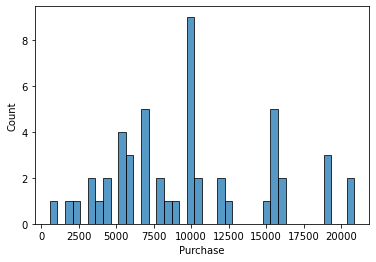

In [89]:
sns.histplot(train[train['User_ID']==1003079]['Purchase'], bins=40)

## Correlations

In [90]:
train.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716,0.006311,0.007354
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833,0.070723,0.014424
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463,-0.006371,0.014119
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703,-0.102391,-0.171320
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918,-0.038995,0.006783
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006,0.035584,0.046400
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.312076,0.234103
User_order,0.006311,0.070723,-0.006371,-0.102391,-0.038995,0.035584,0.312076,1.000000,0.531747
User_order_1,0.007354,0.014424,0.014119,-0.171320,0.006783,0.046400,0.234103,0.531747,1.000000


In [91]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [92]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'User_order',
       'User_order_1'],
      dtype='object')

In [93]:
train.columns[2:-1]

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'User_order'],
      dtype='object')

In [94]:
cat_corr = pd.Series([correlation_ratio(train[i], train['Purchase']) for i in train.columns[2:-1]], 
                     index=train.columns[2:-1])

In [95]:
cat_corr

Gender                        0.060346
Age                           0.021033
Occupation                    0.059731
City_Category                 0.063988
Stay_In_Current_City_Years    0.008260
Marital_Status                0.000463
Product_Category_1            0.797843
Product_Category_2            0.314074
Product_Category_3            0.116420
Purchase                      1.000000
User_order                    0.322415
dtype: float64

## Mean based on ID

In [96]:
pd.concat([train[['User_ID', 'Product_ID']], test[['User_ID', 'Product_ID']]]).value_counts().max()

1

In [97]:
pd.concat([train[['User_ID', 'Product_Category_1']], test[['User_ID', 'Product_Category_1']]]).value_counts()

User_ID  Product_Category_1
1001680  5                     406
1004277  8                     399
1003618  8                     369
1000889  5                     366
         8                     366
                              ... 
1001641  13                      1
1004215  20                      1
1001641  20                      1
1004215  10                      1
1004455  11                      1
Length: 61956, dtype: int64

In [98]:
pd.concat([train[['User_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']],
            test[['User_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']]]).value_counts()

User_ID  Product_Category_1  Product_Category_2  Product_Category_3
1004021  1                   2.0                 15.0                  25
1001647  1                   2.0                 15.0                  25
1002186  1                   2.0                 15.0                  24
1000245  1                   2.0                 15.0                  24
1002088  1                   2.0                 15.0                  24
                                                                       ..
1002419  6                   11.0                13.0                   1
                             10.0                13.0                   1
                             8.0                 16.0                   1
                                                 15.0                   1
1006040  10                  14.0                16.0                   1
Length: 138372, dtype: int64

In [99]:
train[['User_ID', 'Product_Category_1']].value_counts()

User_ID  Product_Category_1
1004277  8                     276
1001680  5                     273
1003618  8                     267
1000889  8                     252
1001150  5                     249
                              ... 
1004307  15                      1
1001300  15                      1
1002942  14                      1
1004307  2                       1
1001284  4                       1
Length: 56782, dtype: int64

In [100]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'User_order',
       'User_order_1'],
      dtype='object')

In [101]:
train.groupby(by='User_ID').std()['Purchase'].mean()

4863.435596348645

In [102]:
train.groupby(by='Product_ID').std()['Purchase'].mean()

2370.8477078449678

In [103]:
for i in train.columns[2:11]:
    print(i)
    print(train.groupby(by=i).std()['Purchase'].mean())

Gender
4929.709749534707
Age
5034.9950953907955
Occupation
4999.827751371873
City_Category
5012.3589751519785
Stay_In_Current_City_Years
5020.1032463749825
Marital_Status
5022.122618233758
Product_Category_1
2620.0866086127635
Product_Category_2
4370.156693099383
Product_Category_3
4689.431433339344


In [47]:
user = defaultdict(list)

In [48]:
for i in train.index:
    user[train.loc[i, 'User_ID']].append(train.loc[i, 'Purchase'])

In [49]:
product = defaultdict(list)

In [50]:
for i in train.index:
    product[train.loc[i, 'Product_ID']].append(train.loc[i, 'Purchase'])

In [51]:
pred_product = []

In [52]:
for i in train['Product_ID'].values:
    if product[i]:
        pred_product.append(np.array(product[i]).mean())
    else:
        pred_product.append(9000)

In [53]:
train['pred_product'] = pred_product

In [54]:
pred_user = []

In [55]:
for i in train['User_ID'].values:
    if user[i]:
        pred_user.append(np.array(user[i]).mean())
    else:
        pred_user.append(9000)

In [56]:
train['pred_user'] = pred_user

In [114]:
train['pred_product'].mean()

9263.968712958243

In [115]:
train['pred_user'].mean()

9263.96871295947

In [116]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1,pred_product,pred_user
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,3130,2465.0,11870.863436,9545.514286
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,3130,4018.0,16304.030981,9545.514286
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,3130,784.0,1237.892157,9545.514286
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,3130,784.0,1455.140762,9545.514286
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,4302,4322.0,7692.763547,10525.610390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368,5755,1273.0,374.930705,13940.083333
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371,137,1330.0,374.266585,6293.717105
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137,1163,398.0,374.266585,8007.894942
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365,716,1215.0,374.266585,7502.833333


In [117]:
train[(train['User_ID']==1006036) & (train['Product_ID'] == 'P00375436')]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1,pred_product,pred_user
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137,1163,398.0,374.266585,8007.894942


In [118]:
train[(train['User_ID']==1006036) & (train['Product_Category_1'] == 20) & (train['Product_Category_2'] == np.nan) & (train['Product_Category_3'] == np.nan)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1,pred_product,pred_user


In [119]:
train['Product_ID']

0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
550063    P00372445
550064    P00375436
550065    P00375436
550066    P00375436
550067    P00371644
Name: Product_ID, Length: 550068, dtype: object

In [120]:
p = train[train['Product_ID']=='P00298842']

In [121]:
p.sort_values(by='User_order_1')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1,pred_product,pred_user
17493,1002760,P00298842,M,55+,0,C,1,0,2,NaN,NaN,13260,3600,1956.0,13260.0,9898.468085


In [122]:
train[train['Product_Category_1']==1].sort_values(by='User_order_1')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1,pred_product,pred_user
369785,1002982,P00079742,M,26-35,4,C,0,0,1,2.0,15.0,3799,5471,1.0,10145.550186,12488.300000
357516,1001107,P00304542,F,51-55,1,C,1,1,1,5.0,NaN,3838,247,2.0,6958.750000,6694.489362
404693,1002202,P00129342,F,0-17,10,C,2,0,1,5.0,15.0,3848,127,3.0,11361.015901,6225.380952
164962,1001471,P00242742,M,26-35,17,B,1,0,1,2.0,9.0,3879,1437,4.0,13461.018930,8255.000000
112950,1005439,P00351142,M,55+,13,B,1,1,1,8.0,17.0,3886,396,5.0,14458.457944,7014.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364947,1002108,P00044442,M,0-17,10,C,1,0,1,16.0,NaN,19650,4326,5763.0,15877.206121,10559.812500
456441,1004254,P00110842,M,26-35,17,C,2,0,1,2.0,5.0,19675,2692,5764.0,16698.455894,9218.923077
167305,1001813,P00173342,F,36-45,6,C,3,0,1,6.0,14.0,19703,393,5765.0,14761.819355,7003.700000
354147,1000559,P00044442,F,26-35,7,C,1,0,1,16.0,NaN,19703,2046,5766.0,15877.206121,8769.545455


In [123]:
min_ = p['Purchase'].min()

In [305]:
min_

13260

In [306]:
max_ = p['Purchase'].max()

In [307]:
max_

13260

In [308]:
c = (max_ - min_) / 9

In [309]:
c

0.0

In [310]:
p.shape

(1, 17)

In [311]:
p['Product_Category_1'].unique()

array([2], dtype=int64)

In [313]:
r = train[train['Product_Category_1']==2]['User_order_1'].nunique()

In [314]:
r

4296

In [113]:
train[train['Product_Category_1']==1].groupby(by='User_ID').mean()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1,pred_product,pred_user
User_ID,,,,,,,,,,
1000001,10.0,0.0,1.0,4.500000,11.250000,15401.000000,3130.0,4018.0,16809.045517,9545.514286
1000002,16.0,0.0,1.0,9.466667,13.555556,13344.161290,4302.0,2002.0,13653.403636,10525.610390
1000003,15.0,0.0,1.0,2.400000,11.700000,15238.533333,5207.0,3850.0,14469.424099,11780.517241
1000004,7.0,1.0,1.0,8.500000,14.111111,15845.153846,5822.0,4588.0,15492.915384,14747.714286
1000005,20.0,1.0,1.0,10.941176,13.125000,10800.055556,923.0,460.0,14366.460588,7745.292453
...,...,...,...,...,...,...,...,...,...,...
1006035,1.0,0.0,1.0,6.941176,12.586207,11542.147059,137.0,706.0,12589.619089,6293.717105
1006036,15.0,1.0,1.0,8.023529,13.315789,11395.534884,1163.0,641.0,13435.942443,8007.894942
1006037,1.0,0.0,1.0,10.500000,13.700000,13438.928571,2634.0,2077.0,14861.762393,9176.540984


In [315]:
list_means = []

In [316]:
n = 0
for i in range(9):
    p_cat = p[(p['Purchase'] >= min_+c*(i)) & (p['Purchase'] <= min_+c*(i+1))]['Purchase']
    n += p_cat.shape[0] / p.shape[0] * r
    print(i % 2)
    print(p_cat.shape[0] / p.shape[0] * r)
    if i % 2 == 0:
        list_means.append([np.ceil(n), p_cat.mean()])
    print(p_cat.mean())

0
4296.0
13260.0
1
4296.0
13260.0
0
4296.0
13260.0
1
4296.0
13260.0
0
4296.0
13260.0
1
4296.0
13260.0
0
4296.0
13260.0
1
4296.0
13260.0
0
4296.0
13260.0


In [317]:
list_means

[[4296.0, 13260.0],
 [12888.0, 13260.0],
 [21480.0, 13260.0],
 [30072.0, 13260.0],
 [38664.0, 13260.0]]

In [318]:
list_pred = []

In [319]:
for i in range(p.shape[0]):
    for j in list_means:
        if p['User_order_1'].values[i] <= j[0]:
            list_pred.append(j[1])
            break
    # print(p['User_order_1'].values[i])

In [320]:
len(list_pred)

1

In [321]:
p['predictions'] = list_pred

C:\Users\dsanr\AppData\Local\Temp/ipykernel_12304/1662939322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['predictions'] = list_pred


In [323]:
p.sample(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1,pred_product,pred_user,prediction,predictions
17493,1002760,P00298842,M,55+,0,C,1,0,2,NaN,NaN,13260,3600,1956.0,13260.0,9898.468085,13260.0,13260.0


In [122]:
def product_predictions(df):
    pc = df['Product_Category_1'].unique()[0]
    r = train[train['Product_Category_1']==pc]['User_order_1'].nunique()
    min_ = df['Purchase'].min()
    max_ = df['Purchase'].max()
    c = (max_ - min_) / 9
    list_means = []
    n = 0
    for i in range(9):
        p_cat = df[(df['Purchase'] >= min_+c*(i)) & (df['Purchase'] <= min_+c*(i+1))]['Purchase']
        
        n += p_cat.shape[0] / df.shape[0] * r
        
        if i % 2 == 0:
            list_means.append([np.ceil(n), p_cat.mean()])
    
    list_pred = []
    for i in range(df.shape[0]):
        for j in list_means:
            if df['User_order_1'].values[i] <= j[0]:
                list_pred.append(j[1])
                break
    df['predictions'] = list_pred
    return df

In [123]:
train['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [124]:
len(train['Product_ID'].unique())

3631

In [125]:
product_predictions(train[train['Product_ID']=='P00285442'])

C:\Users\dsanr\AppData\Local\Temp/ipykernel_12304/299445596.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predictions'] = list_pred


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1,pred_product,pred_user,predictions
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,4302,4322.0,7692.763547,10525.610390,8073.95
164,1000033,P00285442,M,46-50,3,A,1,1,8,NaN,NaN,7854,2355,1113.0,7692.763547,8983.416667,NaN
190,1000035,P00285442,M,46-50,1,C,4+,1,8,NaN,NaN,6139,618,1857.0,7692.763547,7399.126126,8073.95
1516,1000245,P00285442,M,36-45,16,B,0,0,8,NaN,NaN,5855,286,788.0,7692.763547,6801.958621,NaN
4432,1000727,P00285442,M,36-45,11,B,4+,1,8,NaN,NaN,6189,1494,2644.0,7692.763547,8301.219178,8073.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533786,1004167,P00285442,M,26-35,20,B,1,0,8,NaN,NaN,10063,3745,4463.0,7692.763547,10018.804270,8073.95
537014,1004653,P00285442,M,36-45,12,B,3,1,8,NaN,NaN,7794,1280,1038.0,7692.763547,8111.839286,NaN
542045,1005468,P00285442,M,26-35,12,A,1,0,8,NaN,NaN,5940,3594,3032.0,7692.763547,9895.490991,8073.95
543113,1005627,P00285442,M,26-35,0,A,4+,1,8,NaN,NaN,5972,701,673.0,7692.763547,7492.360870,NaN


In [126]:
train_predict = pd.DataFrame()

In [127]:
for i in train['Product_ID'].unique()[:]:
    try:
        res = product_predictions(train[train['Product_ID']==i])
    except ValueError:
        print(i)
    train_predict = pd.concat([train_predict, res])

C:\Users\dsanr\AppData\Local\Temp/ipykernel_12304/299445596.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predictions'] = list_pred


In [113]:
train_predict

NameError: name 'train_predict' is not defined

In [129]:
train_predict.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1,pred_product,pred_user,predictions
241031,1001173,P00208342,F,26-35,7,A,3,0,1,16.0,NaN,11994,813,993.0,13941.651685,7618.354369,11741.620690
536511,1004569,P00028042,M,26-35,0,C,2,0,1,16.0,NaN,15406,5663,2995.0,12226.625000,13302.553571,11769.966292
81766,1000635,P00336142,M,55+,17,C,4+,1,5,12.0,NaN,1995,2372,4819.0,5177.560000,8993.529412,7041.142857
487268,1003117,P00113042,M,36-45,0,C,4+,1,11,16.0,NaN,6171,3550,3023.0,6390.746269,9865.000000,7503.006431
241178,1001193,P00127242,M,26-35,12,C,3,1,1,16.0,NaN,12048,604,328.0,13710.317804,7382.849673,7968.602941
392900,1000474,P00213742,M,26-35,17,B,1,0,8,NaN,NaN,10045,2040,581.0,8472.216524,8765.491429,6017.690476
462856,1005288,P00338542,M,55+,13,A,3,0,1,NaN,NaN,19703,878,2640.0,14401.505995,7686.913043,15549.089623
368539,1002793,P00192542,M,36-45,7,B,3,0,1,2.0,9.0,11615,4577,3878.0,12820.051136,10836.156182,15529.293333
320391,1001352,P00112842,M,36-45,20,B,2,0,8,17.0,NaN,7926,2784,1758.0,8583.097826,9281.222222,7957.080645
488864,1003387,P00118242,M,18-25,1,B,3,1,5,8.0,NaN,5182,2142,2358.0,6904.500000,8844.177215,7019.121212


<AxesSubplot:xlabel='Purchase', ylabel='Count'>

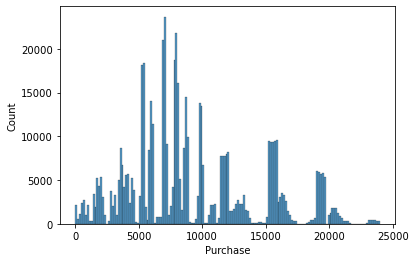

In [130]:
sns.histplot(train_predict['Purchase'])

<AxesSubplot:xlabel='predictions', ylabel='Count'>

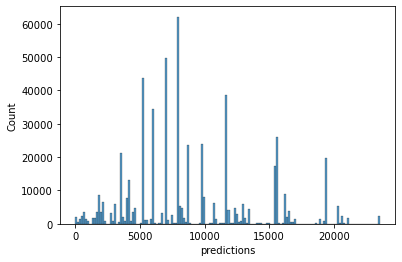

In [131]:
sns.histplot(train_predict['predictions'])

<AxesSubplot:xlabel='pred_product', ylabel='Count'>

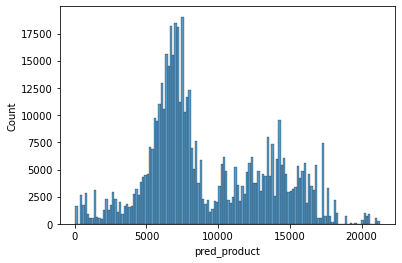

In [132]:
sns.histplot(train_predict['pred_product'])

In [149]:
mean_squared_error(train_predict['Purchase'].values, train_predict['pred_product'].values, squared=False)

2648.824731685407

In [ ]:
mean_squared_error(train_predict['Purchase'].values, train_predict['predictions'].fillna(7500).values, squared=False)

In [ ]:
mean_squared_error(train_predict.dropna(subset=['predictions'])['Purchase'].values, train_predict.dropna(subset=['predictions'])['pred_product'].values, squared=False)

## for test set

In [184]:
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [57]:
test_pred_product = []

In [58]:
for i in test['Product_ID'].values:
    if product[i]:
        test_pred_product.append(np.array(product[i]).mean())
    else:
        test_pred_product.append(7000)

In [59]:
test['pred_product'] = test_pred_product

In [60]:
test_pred_user = []

In [61]:
for i in test['User_ID'].values:
    if user[i]:
        test_pred_user.append(np.array(user[i]).mean())
    else:
        test_pred_user.append(7000)

In [62]:
test['pred_user'] = test_pred_user

In [191]:
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,pred_product,pred_user
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,15781.118590,14747.714286
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,11746.665354,10243.086207
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,5731.338028,9728.744395
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,1943.266667,9728.744395
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,2585.590829,7957.471429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,8254.105960,8007.894942
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,6550.075342,8007.894942
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,10346.816754,8007.894942
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,18139.306931,9176.540984


In [237]:
test_predict = pd.DataFrame()

In [288]:
test['Product_ID'].unique()

array(['P00128942', 'P00113442', 'P00288442', ..., 'P00270742',
       'P00253842', 'P00325442'], dtype=object)

In [239]:
def test_product_predictions(df, test_df):
    pc = df['Product_Category_1'].unique()[0]
    r = train[train['Product_Category_1']==pc]['User_order_1'].nunique()
    min_ = df['Purchase'].min()
    max_ = df['Purchase'].max()
    c = (max_ - min_) / 9
    list_means = []
    n = 0
    for i in range(9):
        p_cat = df[(df['Purchase'] >= min_+c*(i)) & (df['Purchase'] <= min_+c*(i+1))]['Purchase']
        
        n += p_cat.shape[0] / df.shape[0] * r
        
        if i % 2 == 0:
            list_means.append([np.ceil(n), p_cat.mean()])
    
    list_pred = []
    for i in range(test_df.shape[0]):
        for j in list_means:
            if df['User_order_1'].values[i] <= j[0]:
                list_pred.append(j[1])
                break
    test_df['predictions'] = list_pred
    return test_df

In [301]:
test_product_predictions(train[train['Product_ID']=='P00298842'], test[test['Product_ID']=='P00298842'])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [241]:
for i in test['Product_ID'].unique()[:]:
    try:
        res = test_product_predictions(train[train['Product_ID']==i], test[test['Product_ID']==i])
    except ValueError:
        print(i)
    except IndexError:
        print(i, 'n')
    test_predict = pd.concat([test_predict, res])

C:\Users\dsanr\AppData\Local\Temp/ipykernel_12304/1451386513.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predictions'] = list_pred


P00168242 n
P00107442 n
P0096242 n
P00170042 n
P00163942 n
P00153042 n
P00336842 n
P00264342 n
P00069442 n
P00330142 n
P00357542 n
P00100242 n
P00067442 n
P00227242 n
P00306842 n
P00072042 n
P00133042 n
P00169842 n
P00065742 n
P00272442 n
P00104442 n
P00092742 n
P00255242 n
P00335342 n
P00079342 n
P00060742 n
P00012642 n
P00309842 n
P00315342 n
P00308542 n
P0099542 n
P00359842 n
P00167042 n
P00253342 n
P00060342 n
P00187642 n
P00156942 n
P00235142 n
P00013042 n
P00070142 n
P00082142 n
P00137942 n
P00188142 n
P00279042 n
P00268942 n
P00061642 n
P00298842 n
P00077642 n
P00165542 n
P00062542 n
P00300142 n
P00016242 n
P00105742 n
P00140842 n
P00335642 n
P00107242 n
P00236842 n
P00172942 n
P00362242 n
P00262842 n
P00056942 n
P00039042 n
P00154942 n
P00270342 n
P00329142 n
P00062242 n
P00058842 n
P00322842 n
P00322642 n
P00294942 n
P00231642 n
P00312642 n
P00042642 n
P00082642 n
P00074542 n
P00038942 n
P00063942 n
P00106242 n
P00204642 n
P00239542 n
P00166542 n
P00249942 n
P00030342 n
P00074

In [299]:
train[train['Product_ID']=='P00298842']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1,pred_product,pred_user,prediction
17493,1002760,P00298842,M,55+,0,C,1,0,2,NaN,NaN,13260,3600,1956.0,13260.0,9898.468085,13260.0


In [300]:
test[test['Product_ID']=='P00298842']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,pred_product,pred_user
63849,1002550,P00298842,M,51-55,7,C,2,1,2,NaN,NaN,13260.0,9024.036364
163384,1005594,P00298842,F,46-50,0,B,1,1,2,NaN,NaN,13260.0,9221.414286
205282,1004579,P00298842,F,18-25,4,B,1,1,2,NaN,NaN,13260.0,8735.035806


In [351]:
test_predict

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,pred_product,pred_user,predictions,prediction
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,15781.118590,14747.714286,15556.525478,15556.525478
1025,1001666,P00128942,M,26-35,14,B,3,0,1,11.0,NaN,15781.118590,9060.273543,15556.525478,15556.525478
1237,1001948,P00128942,M,0-17,10,B,3,0,1,11.0,NaN,15781.118590,10725.567308,15556.525478,15556.525478
2225,1003645,P00128942,M,36-45,17,C,4+,1,1,11.0,NaN,15781.118590,10510.085714,11770.407216,11770.407216
3263,1005253,P00128942,F,55+,13,C,1,0,1,11.0,NaN,15781.118590,9239.961538,15556.525478,15556.525478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230669,1001470,P00253842,M,18-25,4,A,1,1,5,8.0,NaN,7000.000000,7247.212500,8000.000000,8000.000000
230802,1001671,P00140842,M,36-45,0,B,2,0,5,NaN,NaN,7000.000000,8767.698895,8000.000000,8000.000000
231013,1001941,P00255242,M,36-45,17,A,1,0,1,NaN,NaN,11360.727273,7591.863029,8000.000000,8000.000000
231267,1002339,P00335642,F,55+,3,C,4+,1,5,NaN,NaN,6883.000000,11708.866667,8000.000000,8000.000000


In [324]:
test_predict.drop_duplicates(inplace=True)

In [286]:
for i in tpg.index:
    if (tpg.loc[i][0] - tg.loc[i][0]) != 0:
        print(i, tpg.loc[i][0], tg.loc[i][0])

P00006642 2 1
P00008342 4 2
P00014842 390 195
P00015042 26 13
P00022242 2 1
P00022342 36 18
P00029042 15 5
P00033842 20 10
P00045542 136 68
P00046542 12 6
P00058542 9 3
P00059942 44 22
P00060442 2 1
P00066842 2 1
P00067042 2 1
P00071642 6 3
P00072342 14 7
P00076642 3 1
P00077342 2 1
P00078042 12 6
P00083442 34 17
P00086142 146 73
P00088942 82 41
P00090042 12 6
P00091042 16 8
P00092242 12 6
P00092342 4 2
P00103742 22 11
P00107642 36 18
P00108542 278 139
P00144142 2 1
P00144542 12 6
P00151942 20 10
P00159042 2 1
P00161642 3 1
P00168542 4 2
P00169942 15 3
P00172042 6 3
P00174742 16 8
P00175042 34 17
P00180142 44 22
P00188342 6 3
P00196942 60 30
P00210142 6 3
P00211342 6 3
P00220842 16 8
P00222642 60 30
P00228542 28 14
P00231842 8 4
P00253642 14 7
P00261042 2 1
P00261942 4 2
P00262642 3 1
P00265942 4 2
P00267742 136 68
P00270042 114 57
P00270742 2 1
P00276742 16 8
P00287742 12 4
P00290342 30 15
P00293842 102 51
P00297742 202 101
P00300742 2 1
P00305342 32 16
P00305742 2 1
P00307442 96 48
P

In [277]:
tg = test.groupby(by='Product_ID').count()

In [278]:
tpg = test_predict.groupby(by='Product_ID').count()

In [290]:
test_predict[['User_ID', 'Product_ID']].value_counts()

User_ID  Product_ID
1001764  P00169942     5
1002015  P00169942     5
1002344  P00169942     5
1001780  P00287742     3
1003592  P00029042     3
                      ..
1001980  P00282642     1
         P00283142     1
         P00283942     1
         P00285842     1
1006040  P0097242      1
Length: 233313, dtype: int64

In [330]:
miss = test[test['Product_ID'].isin(list(set(test['Product_ID'].values) - set(test_predict['Product_ID'].values)))]

In [331]:
miss['predictions'] = np.nan

C:\Users\dsanr\AppData\Local\Temp/ipykernel_12304/2705781931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss['predictions'] = np.nan


In [332]:
miss

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,pred_product,pred_user,predictions
30,1000053,P00168242,M,26-35,0,B,1,0,5,16.0,NaN,7000.000000,11327.244032,NaN
495,1000889,P00107442,M,46-50,20,A,1,0,5,NaN,NaN,1924.000000,6682.712029,NaN
720,1001205,P0096242,F,55+,0,C,1,1,4,8.0,NaN,3143.000000,7477.518519,NaN
781,1001281,P00170042,M,26-35,19,C,1,0,8,NaN,NaN,7711.375000,7215.083333,NaN
2049,1003391,P00163942,M,18-25,4,A,0,0,8,NaN,NaN,7526.250000,9279.598854,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230669,1001470,P00253842,M,18-25,4,A,1,1,5,8.0,NaN,7000.000000,7247.212500,NaN
230802,1001671,P00140842,M,36-45,0,B,2,0,5,NaN,NaN,7000.000000,8767.698895,NaN
231013,1001941,P00255242,M,36-45,17,A,1,0,1,NaN,NaN,11360.727273,7591.863029,NaN
231267,1002339,P00335642,F,55+,3,C,4+,1,5,NaN,NaN,6883.000000,11708.866667,NaN


In [333]:
test_predict = pd.concat([test_predict, miss])

In [325]:
set(test['Product_ID'].values) - set(test_predict['Product_ID'].values)

{'P00012642',
 'P00013042',
 'P00016242',
 'P00030342',
 'P00038942',
 'P00039042',
 'P00042642',
 'P00056942',
 'P00058842',
 'P00060342',
 'P00060742',
 'P00061642',
 'P00062242',
 'P00062542',
 'P00063942',
 'P00065742',
 'P00067442',
 'P00069442',
 'P00070142',
 'P00072042',
 'P00074542',
 'P00074942',
 'P00077642',
 'P00079342',
 'P00082142',
 'P00082642',
 'P00092742',
 'P00100242',
 'P00104442',
 'P00105742',
 'P00106242',
 'P00107242',
 'P00107442',
 'P00133042',
 'P00137942',
 'P00140842',
 'P00153042',
 'P00154942',
 'P00156942',
 'P00163942',
 'P00165542',
 'P00166542',
 'P00167042',
 'P00168242',
 'P00169842',
 'P00170042',
 'P00172942',
 'P00187642',
 'P00188142',
 'P00204642',
 'P00227242',
 'P00231642',
 'P00235142',
 'P00236842',
 'P00239542',
 'P00249942',
 'P00253342',
 'P00253842',
 'P00255242',
 'P00262842',
 'P00264342',
 'P00268942',
 'P00270342',
 'P00272442',
 'P00279042',
 'P00294942',
 'P00298842',
 'P00300142',
 'P00306842',
 'P00308542',
 'P00309842',
 'P003

In [427]:
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,pred_product,pred_user
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,15781.118590,14747.714286
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,11746.665354,10243.086207
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,5731.338028,9728.744395
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,1943.266667,9728.744395
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,2585.590829,7957.471429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,8254.105960,8007.894942
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,6550.075342,8007.894942
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,10346.816754,8007.894942
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,18139.306931,9176.540984


In [428]:
test['prediction'] = test_predict['predictions']

In [336]:
test_predict['predictions'].fillna(8000, inplace=True)

In [338]:
test_predict.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
pred_product                       0
pred_user                          0
predictions                        0
prediction                         0
dtype: int64

In [590]:
len(pred)

233599

In [367]:
len(train['User_ID'].unique())

5891

In [368]:
len(test['User_ID'].unique())

5891

In [369]:
len(set(train['User_ID']) - set(test['User_ID']))

0

In [370]:
len(set(test['User_ID']) - set(train['User_ID']))

0

In [350]:
len(train['Product_ID'].unique())

3631

In [357]:
len(test['Product_ID'].unique())

3491

In [353]:
len(set(train['Product_ID']) - set(test['Product_ID']))

186

In [296]:
len(set(test['Product_ID']) - set(train['Product_ID']))

46

In [356]:
len(set(test['Product_ID']).intersection(set(train['Product_ID'])))

3445

# Missing values

In [63]:
from sklearn.impute import KNNImputer

In [64]:
imp = KNNImputer()

In [65]:
X_m = X_m.drop(columns=['Product_Category_1_19', 'Product_Category_1_20'])

NameError: name 'X_m' is not defined

In [66]:
imp.fit(X_m)

NameError: name 'X_m' is not defined

In [149]:
train_trans = pd.DataFrame(imp.transform(X_m), columns=X_m.columns)

In [150]:
train_trans

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,...,Product_Category_3_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550064,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550065,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550066,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Predictions for training set

In [67]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

In [68]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_order,User_order_1,pred_product,pred_user
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,3130,2465.0,11870.863436,9545.514286
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,3130,4018.0,16304.030981,9545.514286
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,3130,784.0,1237.892157,9545.514286
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,3130,784.0,1455.140762,9545.514286
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,4302,4322.0,7692.763547,10525.610390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368,5755,1273.0,374.930705,13940.083333
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371,137,1330.0,374.266585,6293.717105
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137,1163,398.0,374.266585,8007.894942
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365,716,1215.0,374.266585,7502.833333


In [69]:
oe = OrdinalEncoder()

In [70]:
oe.fit_transform(train[['Age', 'Stay_In_Current_City_Years']])

array([[0., 2.],
       [0., 2.],
       [0., 2.],
       ...,
       [2., 4.],
       [6., 2.],
       [4., 4.]])

In [71]:
oe.feature_names_in_

array(['Age', 'Stay_In_Current_City_Years'], dtype=object)

In [72]:
oe.categories_

[array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
       dtype=object),
 array(['0', '1', '2', '3', '4+'], dtype=object)]

In [73]:
ordinal = pd.DataFrame(oe.fit_transform(train[['Age', 'Stay_In_Current_City_Years']]), columns=oe.feature_names_in_)

In [74]:
train_new = pd.concat([train.drop(['Age', 'Stay_In_Current_City_Years'],axis=1),  ordinal], axis=1)

In [75]:
X = train_new[['User_ID', 'Product_ID', 'Gender', 'Occupation', 'City_Category', 'Marital_Status',
               'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
               'Age', 'Stay_In_Current_City_Years', 'pred_product', 'pred_user', 'User_order', 'User_order_1']]

In [76]:
mct = ColumnTransformer(transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'), slice(0,9))], remainder='passthrough')

In [77]:
mct.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'),
                                 slice(0, 9, None))])

In [78]:
X = mct.transform(X)

In [79]:
X

<550068x9610 sparse matrix of type '<class 'numpy.float64'>'
	with 8161520 stored elements in Compressed Sparse Row format>

In [80]:
y = train['Purchase']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [82]:
def model_score(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return model, mean_squared_error(y_test, pred, squared=False)

In [83]:
lr = model_score(LinearRegression(n_jobs=-1))

In [164]:
lr = model_score(RidgeCV(cv=5))

In [84]:
lr

(LinearRegression(n_jobs=-1), 2436.796376877678)

In [160]:
lr = GradientBoostingRegressor()

In [161]:
lr.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
cross_val_score(lr, X_train, y_train, cv=5)

In [ ]:
lr.score(X_test, y_test)

In [85]:
pred = lr[0].predict(X_test)

In [86]:
pred

array([ 7189.28768318,  6023.37869091,  3655.77361234, ...,
        4889.45543142,  5378.94374653, 14017.11532648])

<AxesSubplot:ylabel='Purchase'>

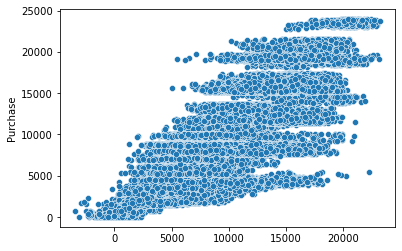

In [88]:
sns.scatterplot(x=pred, y=y_test)

In [168]:
p = pd.DataFrame(pred, columns=['pred'])

In [169]:
p[p['pred'] < 0].index

Int64Index([    13,     27,    103,    194,    266,    617,    953,   1011,
              1220,   1396,
            ...
            163528, 163876, 163979, 164023, 164124, 164147, 164424, 164762,
            164765, 164876],
           dtype='int64', length=1467)

In [170]:
p.loc[p[p['pred'] < 0].index, 'pred'] = 50

In [171]:
p['pred'].values

array([ 7334.56776411,  5718.46241342,  3335.29642047, ...,
        5582.13258398,  3936.80267198, 13592.51805481])

In [172]:
mean_squared_error(y_test, pred, squared=False)

2466.941534326124

In [173]:
coeff = pd.DataFrame({'columns':X.columns, 'coef':lr.coef_})
coeff.sort_values(by='coef', ascending=False)

AttributeError: columns not found

## residuals

In [206]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({'test values' : y_test, 'predicted values' : pred})

residuals['residuals'] = residuals['test values'] - residuals['predicted values']
residuals.head()

,test values,predicted values,residuals
24033,5970,7729.346275,-1759.346275
301904,6060,6720.786727,-660.786727
44698,4615,3231.481865,1383.518135
53213,8654,7941.674751,712.325249
353008,9907,9041.269712,865.730288


In [207]:
residuals['residuals'].mean()

2.7814892809848613

In [208]:
residuals['residuals'].min()

-15971.559730770663

In [209]:
residuals.shape

(165021, 3)

<AxesSubplot:xlabel='residuals', ylabel='Count'>

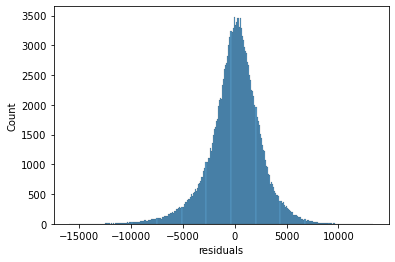

In [210]:
sns.histplot(residuals['residuals'])

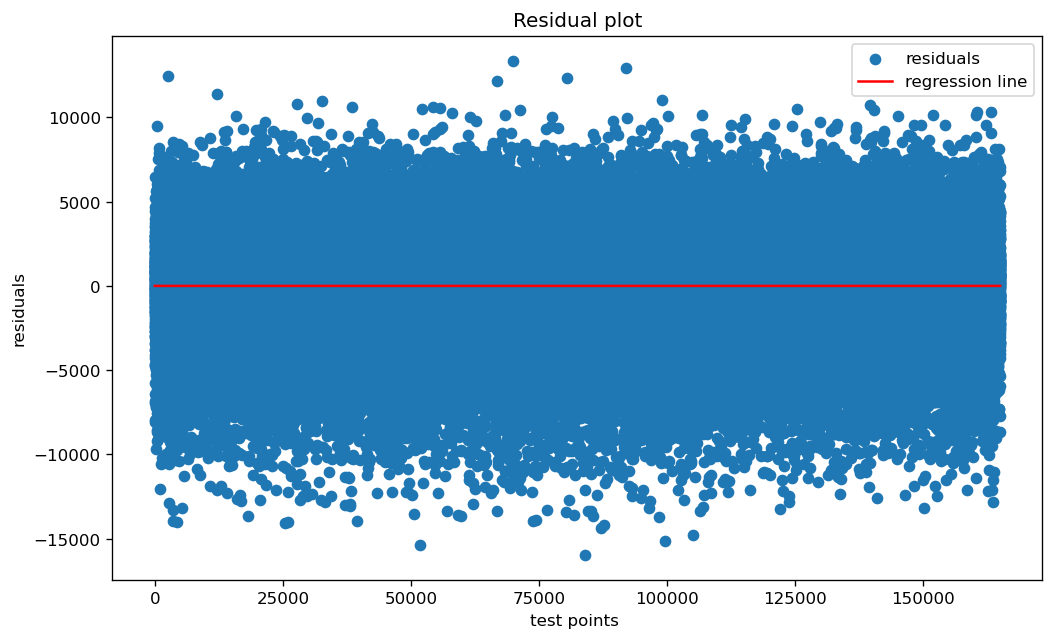

In [211]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,residuals.shape[0])
k = [0 for i in range(0,residuals.shape[0])]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('test points ')
plt.ylabel('residuals')
plt.title('Residual plot')
# plt.ylim(-100000, 100000)
plt.legend()

## Decision tree

In [351]:
dt = model_score(DecisionTreeRegressor(min_samples_split=2, max_depth=10))

In [352]:
dt

(DecisionTreeRegressor(max_depth=10), 2548.0494378816493)

## Random Forest

In [165]:
parameters = {'n_estimators': [100, 500], 'min_samples_split': (2,3), 'max_depth':(7, 9)}

In [166]:
clf = GridSearchCV(RandomForestRegressor(), param_grid=parameters, n_jobs=-1)

NameError: name 'GridSearchCV' is not defined

In [297]:
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [148]:
clf.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_split=3)

In [172]:
rf = model_score(RandomForestRegressor(n_estimators=10, min_samples_split=10, max_depth=10, random_state=101))

In [173]:
rf

(RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=10,
                       random_state=101),
 2317.005515034232)

In [383]:
feature_imp = pd.DataFrame({'columns':X.columns, 'coef':rf[0].feature_importances_})
feature_imp.sort_values(by='coef', ascending=False)

,columns,coef
2,Item_MRP,0.529490
36,Outlet_Type_Grocery Store,0.286850
39,Outlet_Type_Supermarket Type3,0.038225
45,Outlet_Identifier_OUT027,0.035245
21,Outlet_Establishment_Year_1985,0.035229
1,Item_Visibility,0.025150
0,Item_Weight,0.020467
37,Outlet_Type_Supermarket Type1,0.002341
11,Item_Type_Fruits and Vegetables,0.001994
9,Item_Type_Dairy,0.001838


## SVM

In [316]:
parameters = {'C': (1, 10, 100), 'gamma': (.01,.1,1)}

In [317]:
clf = GridSearchCV(SVR(kernel='linear'), param_grid=parameters, n_jobs=-1)

In [318]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVR(kernel='linear'), n_jobs=-1,
             param_grid={'C': (1, 10, 100), 'gamma': (0.01, 0.1, 1)})

In [319]:
clf.best_estimator_

SVR(C=100, gamma=0.01, kernel='linear')

In [320]:
svc = model_score(SVR(kernel='linear', C=100, gamma=.01))

In [321]:
svc

(SVR(C=100, gamma=0.01, kernel='linear'), 1084.0385169270885)

## Gradient Boosting

In [317]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=.05)

In [332]:
gbc = model_score(GradientBoostingRegressor(n_estimators=1000, learning_rate=.01))

In [333]:
gbc

(GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000),
 1024.7298198042015)

## Voting

In [402]:
vote = VotingRegressor(estimators=[('lr', lr[0]), ('rf', rf[0]), ('gb', gbc[0])])

In [403]:
vote.fit(X_train, y_train)

VotingRegressor(estimators=[('lr',
                             RidgeCV(alphas=array([  0.1,   1. ,  10. , 100. ]))),
                            ('rf',
                             RandomForestRegressor(max_depth=8,
                                                   min_samples_split=10,
                                                   n_estimators=1000,
                                                   random_state=101)),
                            ('gb',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       n_estimators=1000))])

In [404]:
vote.score(X_test, y_test)

0.6070288280303389

In [385]:
model_score(VotingRegressor(estimators=[('lr', lr[0]), ('rf', rf[0]), ('gb', gbc[0])]))

(VotingRegressor(estimators=[('lr',
                              RidgeCV(alphas=array([  0.1,   1. ,  10. , 100. ]))),
                             ('rf',
                              RandomForestRegressor(max_depth=8,
                                                    min_samples_split=10,
                                                    n_estimators=1000,
                                                    random_state=101)),
                             ('gb',
                              GradientBoostingRegressor(learning_rate=0.01,
                                                        n_estimators=1000))]),
 1027.4785516901254)

In [386]:
[lr[1], rf[1], svc[1], gbc[1]]

[1077.1870341625113, 1031.11174433209, 1084.0385169270885, 1024.7298198042015]

<AxesSubplot:>

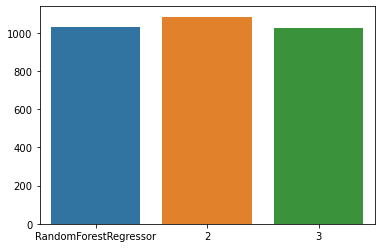

In [387]:
sns.barplot(y=[rfc[1], svc[1], gbc[1]], x=[type(rf[0]).__name__,2,3])

# test

In [212]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [213]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [214]:
test.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

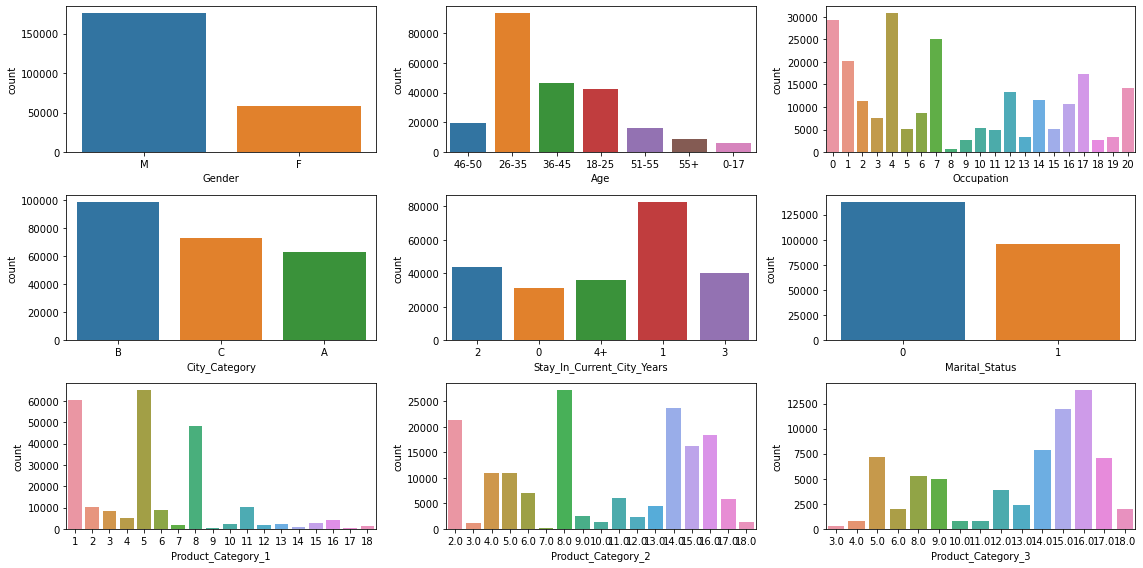

In [215]:
fig, axes = plt.subplots(3, 3, figsize=(16,8))
for i, ax in enumerate(axes.ravel()):
    sns.countplot(x=test.iloc[:, i+2], ax=ax)
plt.tight_layout()

In [202]:
test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'pred_product', 'pred_user',
       'User_order', 'User_order_1'],
      dtype='object')

In [203]:
test_ordinal = pd.DataFrame(oe.transform(test[['Age', 'Stay_In_Current_City_Years']]), columns=oe.feature_names_in_)

In [204]:
test_new = pd.concat([test.drop(['Age', 'Stay_In_Current_City_Years'],axis=1),  test_ordinal], axis=1)

In [205]:
test_new = test_new[['User_ID', 'Product_ID', 'Gender', 'Occupation', 'City_Category', 'Marital_Status',
               'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
               'Age', 'Stay_In_Current_City_Years','pred_product', 'pred_user', 'User_order', 'User_order_1']]

In [206]:
X_t = mct.transform(test_new)

In [207]:
pred = lr[0].predict(X_t)

In [208]:
pred

array([18108.45163846, 11728.45435544,  7333.71067655, ...,
        9228.72644055, 16892.87038936,  2146.59863144])

In [209]:
len(pred)

233599

In [210]:
test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'pred_product', 'pred_user',
       'User_order', 'User_order_1'],
      dtype='object')

In [211]:
User_ID = test['User_ID']

In [212]:
Product_ID = test['Product_ID']

In [213]:
result = pd.DataFrame({'User_ID':test['User_ID'].values, 
                       'Product_ID':test['Product_ID'].values, 
                       'Purchase':pred})
result

,User_ID,Product_ID,Purchase
0,1000004,P00128942,18108.451638
1,1000009,P00113442,11728.454355
2,1000010,P00288442,7333.710677
3,1000010,P00145342,1869.438377
4,1000011,P00053842,1950.483479
...,...,...,...
233594,1006036,P00118942,7536.669650
233595,1006036,P00254642,5799.668581
233596,1006036,P00031842,9228.726441
233597,1006037,P00124742,16892.870389


In [214]:
result[result['Purchase'] < 0].index

Int64Index([   146,    202,    240,    328,    398,    569,    587,    818,
              1064,   1207,
            ...
            231126, 231151, 231178, 231351, 231622, 231692, 231878, 231928,
            232934, 233131],
           dtype='int64', length=958)

In [215]:
result['Purchase'].mean()

9348.730625865674

In [216]:
result['Purchase'] = result['Purchase'].apply(lambda x : 100 if x == 0 else x)

In [217]:
result.to_csv(r'D:\engineering\CS\AI ML Blackbelt +\tests\Black Friday\submission1.csv', index=False)